In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV


import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import validate_model_classification_smote, hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [26]:
dataset_file_path = 'data/preprocessed_dataset.csv'
df = pd.read_csv(dataset_file_path)
df.sample(5)

PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  IGF-1 ng/ml (N: 100-311)  proBNP  AMH (ng/ml) *7,14=pmol/l  weight  height (cm)        BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  hyperandrogenism  hypothyroidism  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  chronic thyroiditis  Vole of the Right Ovary  Volume of the  Left Ovary  ovaries volume - total  follicules >12  WBC x10^3/ul  neutrophil x10^3/ul  \
88                                                          0                     193.0   18.26                      2.98   144.0        172.0  48.674959                              150.0                                   82.0           1.0                     139.0    1.0                   139.0               1.000000             1.0              1.0                   0.808140       1.0                                                       2.0                              1.0                           1.0                                             0.0                                              0.0   1.0        1.0                                                        11.0               1.0             0.0                              8.640                            3.0940         11.7340                                  0.0                  0.0                 5.970000                     5.7500               11.720000             0.0          5.61                 3.53   
810                                                         2                       NaN   29.79                       NaN    54.5        169.0  19.081965                              114.0                                   65.0           0.0                      67.0    0.0                    81.0               0.827160             0.0              1.0                   0.396450       0.0                                                       0.0                              1.0                           0.0                                             0.0                                              0.0   0.0        0.0                                                         0.0               1.0             0.0                              5.453                            4.8790         10.3320                                  0.0                  1.0                 7.120000                    10.5200               17.640000             0.0          3.80                 1.68   
20                                                          0                     278.0   22.03                      1.25    55.0        160.0  21.484375                              118.0                                   79.0           0.0                      72.0    0.0                    76.0               0.947368             1.0              1.0                   0.450000       0.0                                                       0.0                              0.0                           1.0                                             0.0                                              0.0   1.0        1.0                                                        13.0               0.0             1.0                              3.360                            2.5080          5.8680                                  0.0                  1.0                 4.660000                     7.6082               12.268200             0.0          5.83                 2.96   
763                          

In [27]:
df.loc[(df[PCO] != 1) & (df[PCO] != 4), PCO] = np.nan

#  change all 4s to 0s for the need of the visualisation algorithm

#  0 = High Andro, 1 = PCOS
df[PCO] = np.where(df[PCO] == 4, 0, df[PCO])

CLASS_NAMES = ['High Andro', 'PCOS']

In [28]:
df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

(595, 135)


<Axes: >

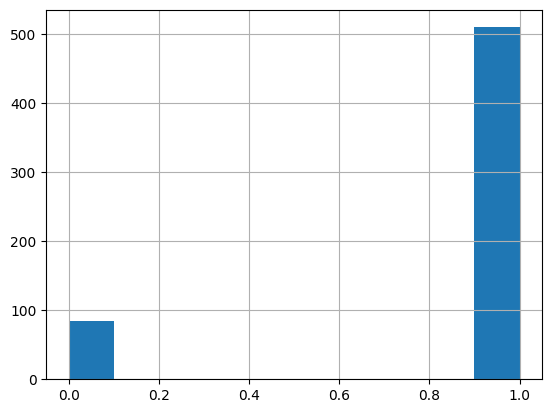

In [29]:
print(df_cleaned.shape)
df_cleaned[PCO].hist()

## Best preprocessing

### For SMOTE

In [30]:
continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

### For training without SMOTE

In [31]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

## Hyperparameter tuning

### Decision Tree

In [18]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [3, 4, 5],
    'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}
Best score (f1_weighted): 0.8284547456509623


params  mean_train_score  mean_test_score
5   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.899761         0.828455
3   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.899743         0.827889
4   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.899743         0.827889
8   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.897211         0.827332
7   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.896899         0.824058
6   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.896899         0.823582
1   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.902759         0.822211
0   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.902462         0.820630
2   {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.902462         0.817668
25  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.934350         0.813078
21  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.941007         0.812239
17  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.921891         0.812041
10  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.930272         0.811306
15  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.921891         0.810635
22  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.941048         0.810315
13  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.926543         0.810236
23  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.940814         0.809894
24  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.935018         0.809348
16  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.922310         0.806657
14  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.927024         0.805624
26  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.935055         0.805509
11  {'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.

In [19]:
# model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

# tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits


Best parameters: {'model__C': 1}
Best score (f1_weighted): 0.8663834904984645


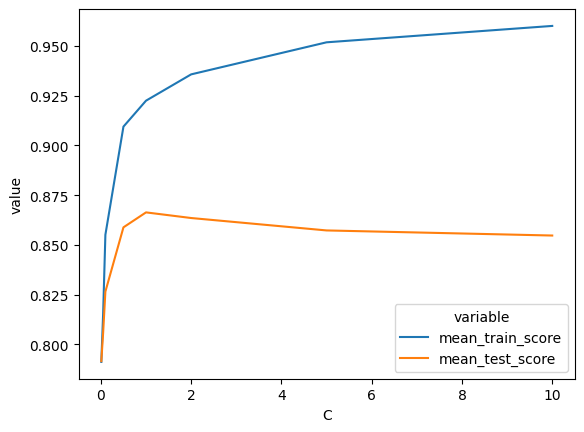

C  mean_train_score  mean_test_score
0  0.01          0.791234         0.791622
1  0.05          0.815300         0.805865
2   0.1          0.855141         0.826570
3   0.5          0.909479         0.858864
4     1          0.922520         0.866383
5     2          0.935745         0.863553
6     5          0.951855         0.857314
7    10          0.960092         0.854755

In [20]:
model_lr = LogisticRegression(multi_class='multinomial', max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear(X_train, y_train, PCO, model_lr, continuous_preprocessor, categorical_preprocessor, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=1

### Random Forest

In [21]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}
Best score (f1_weighted): 0.8542684197833114


params  mean_train_score  mean_test_score
6  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.993894         0.854268
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.993869         0.850152
7  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.993887         0.849459
3  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.997027         0.849450
5  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.995988         0.844757
4  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.996854         0.844617
1  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.999124         0.839380
0  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.998426         0.834665
2  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.997553         0.834501

In [22]:
# model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

# tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
# tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

### SVM

In [ ]:
# model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

# param_grid_svc = {
#     'model__kernel': ['linear', 'rbf', 'sigmoid'],
#     'model__C': [0.1, 1, 10, 100],
#     'model__gamma': [0.1, 1, 10],
#     'model__epsilon': [0.1, 0.2, 0.3],
# }

# svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
# svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

### DecisionTree

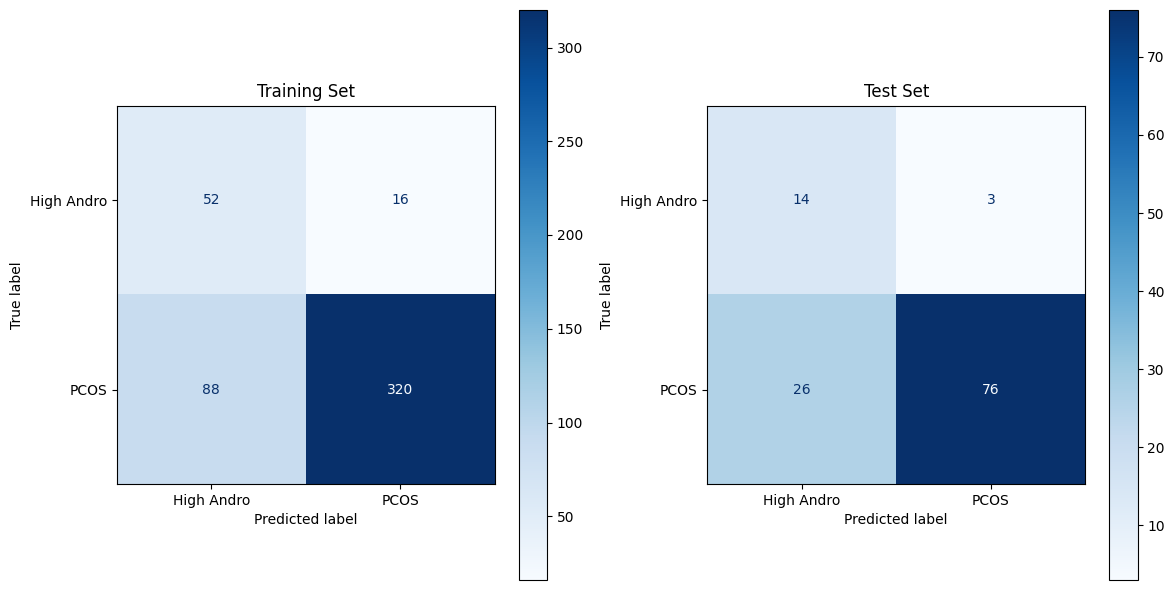

Training set
              precision    recall  f1-score   support

  High Andro       0.37      0.76      0.50        68
        PCOS       0.95      0.78      0.86       408

    accuracy                           0.78       476
   macro avg       0.66      0.77      0.68       476
weighted avg       0.87      0.78      0.81       476

Test set
              precision    recall  f1-score   support

  High Andro       0.35      0.82      0.49        17
        PCOS       0.96      0.75      0.84       102

    accuracy                           0.76       119
   macro avg       0.66      0.78      0.67       119
weighted avg       0.87      0.76      0.79       119



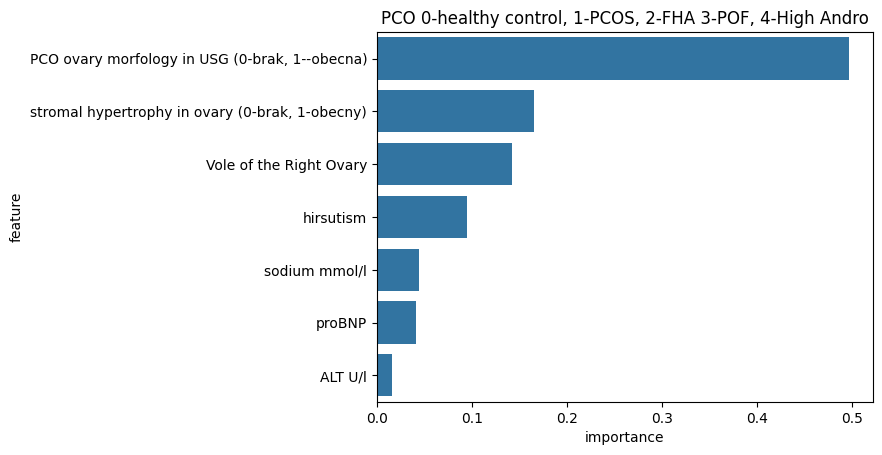

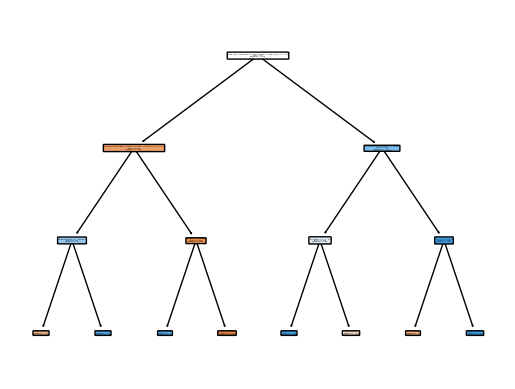

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


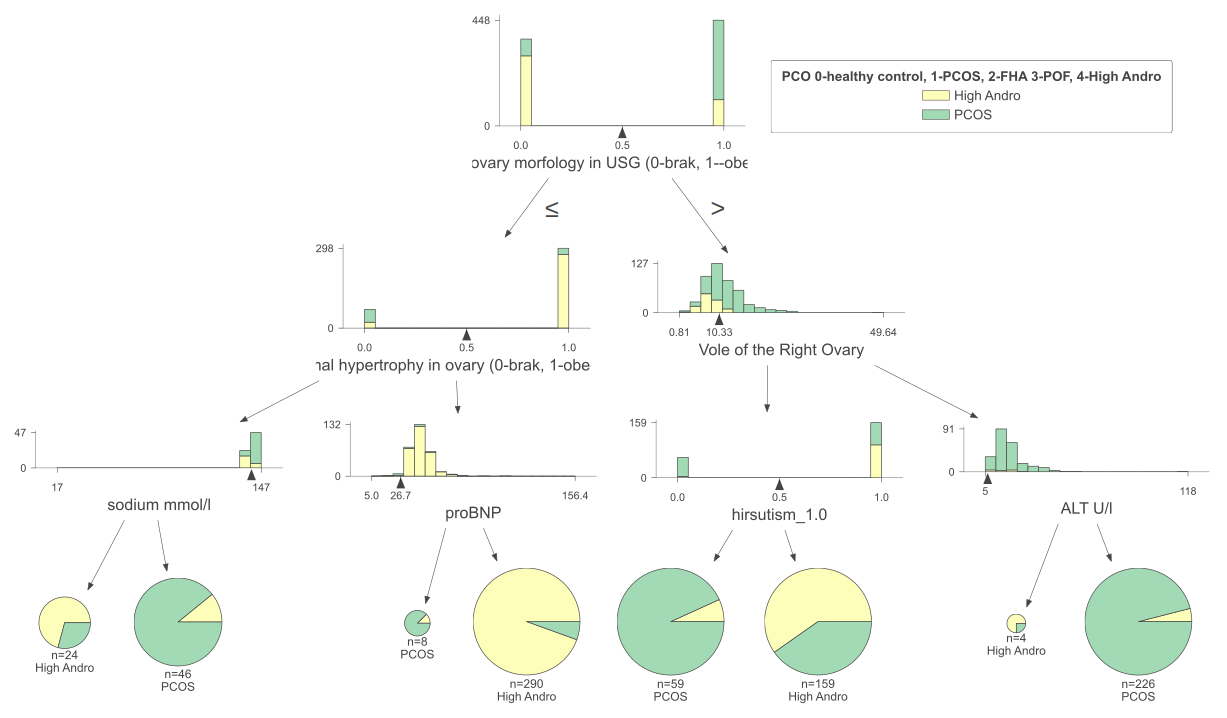

In [32]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=6, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

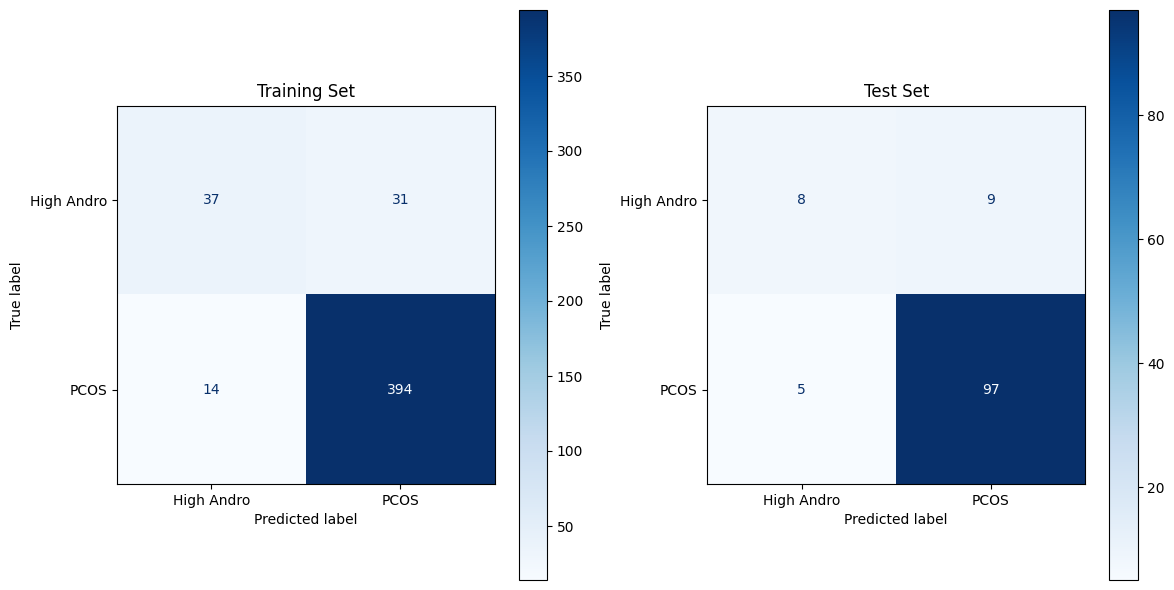

Training set
              precision    recall  f1-score   support

  High Andro       0.73      0.54      0.62        68
        PCOS       0.93      0.97      0.95       408

    accuracy                           0.91       476
   macro avg       0.83      0.75      0.78       476
weighted avg       0.90      0.91      0.90       476

Test set
              precision    recall  f1-score   support

  High Andro       0.62      0.47      0.53        17
        PCOS       0.92      0.95      0.93       102

    accuracy                           0.88       119
   macro avg       0.77      0.71      0.73       119
weighted avg       0.87      0.88      0.88       119



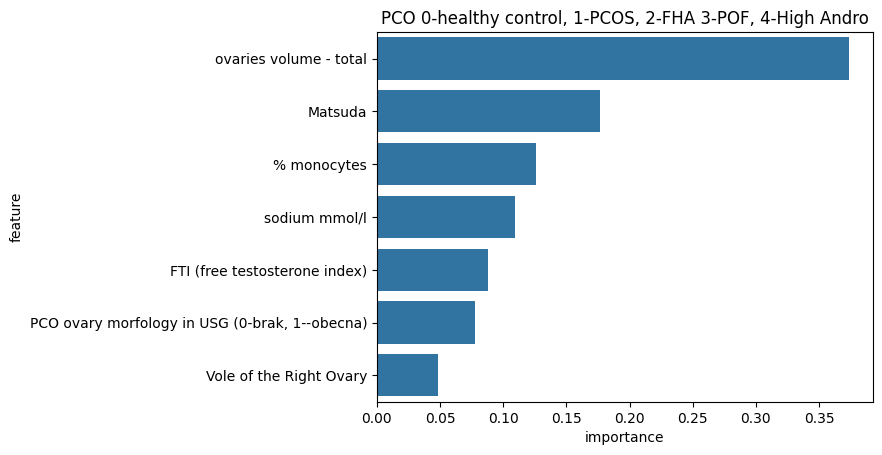

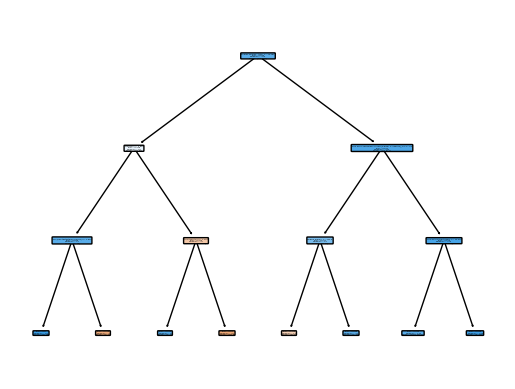

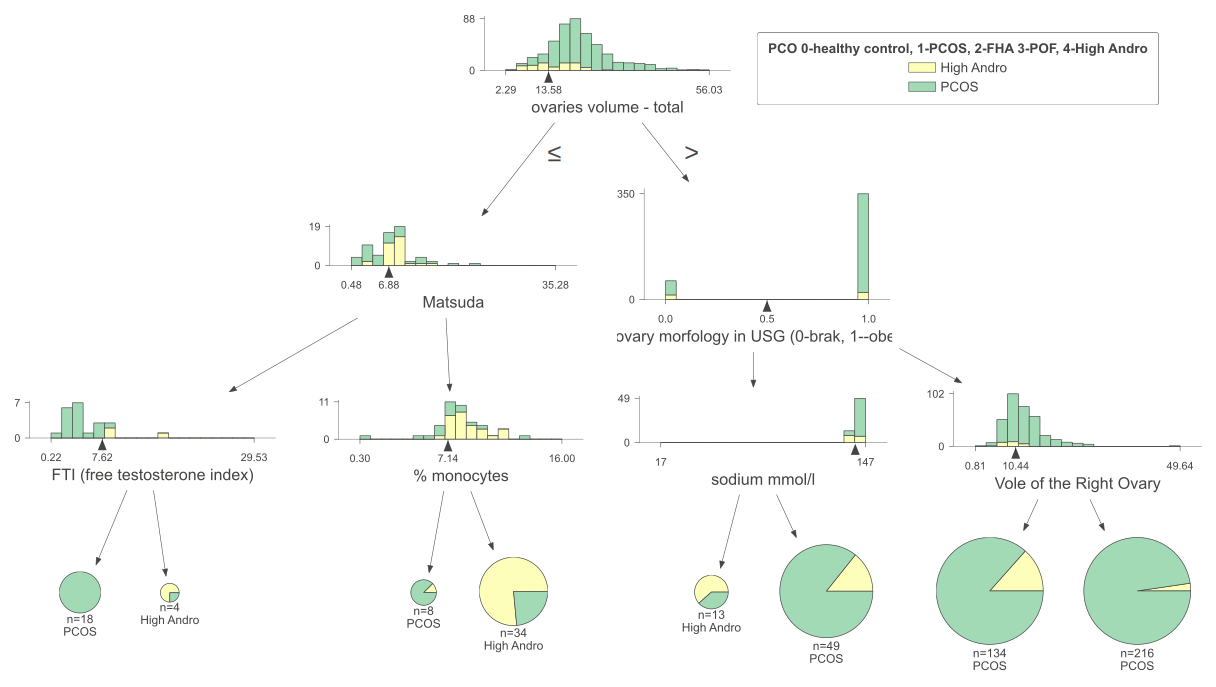

In [34]:
#  bez smote
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=6, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

### RandomForest

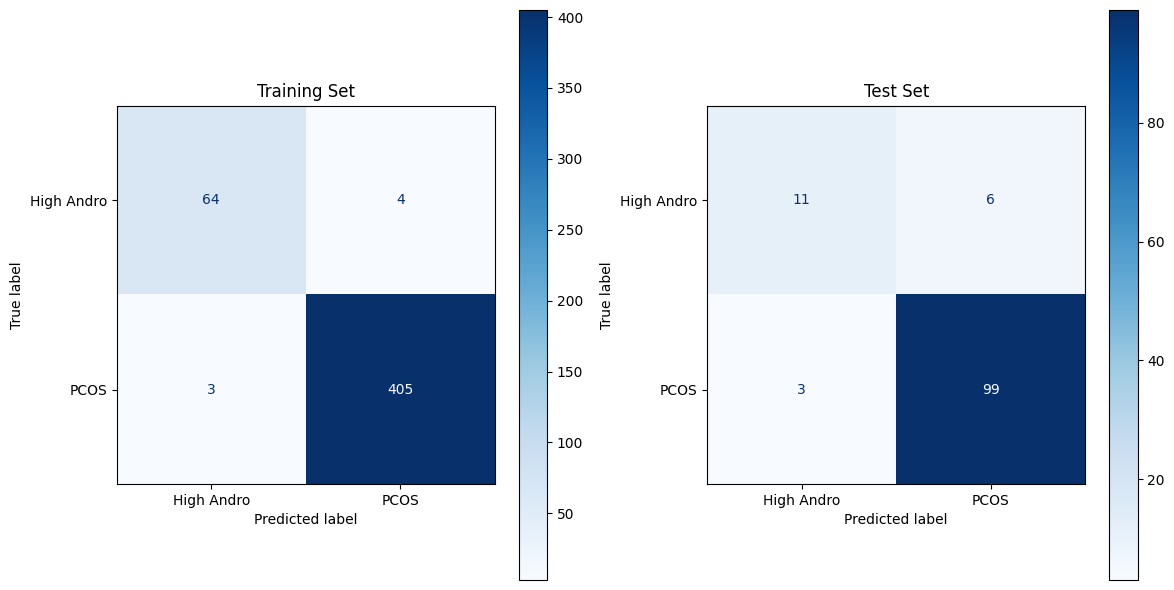

Training set
              precision    recall  f1-score   support

  High Andro       0.96      0.94      0.95        68
        PCOS       0.99      0.99      0.99       408

    accuracy                           0.99       476
   macro avg       0.97      0.97      0.97       476
weighted avg       0.99      0.99      0.99       476

Test set
              precision    recall  f1-score   support

  High Andro       0.79      0.65      0.71        17
        PCOS       0.94      0.97      0.96       102

    accuracy                           0.92       119
   macro avg       0.86      0.81      0.83       119
weighted avg       0.92      0.92      0.92       119



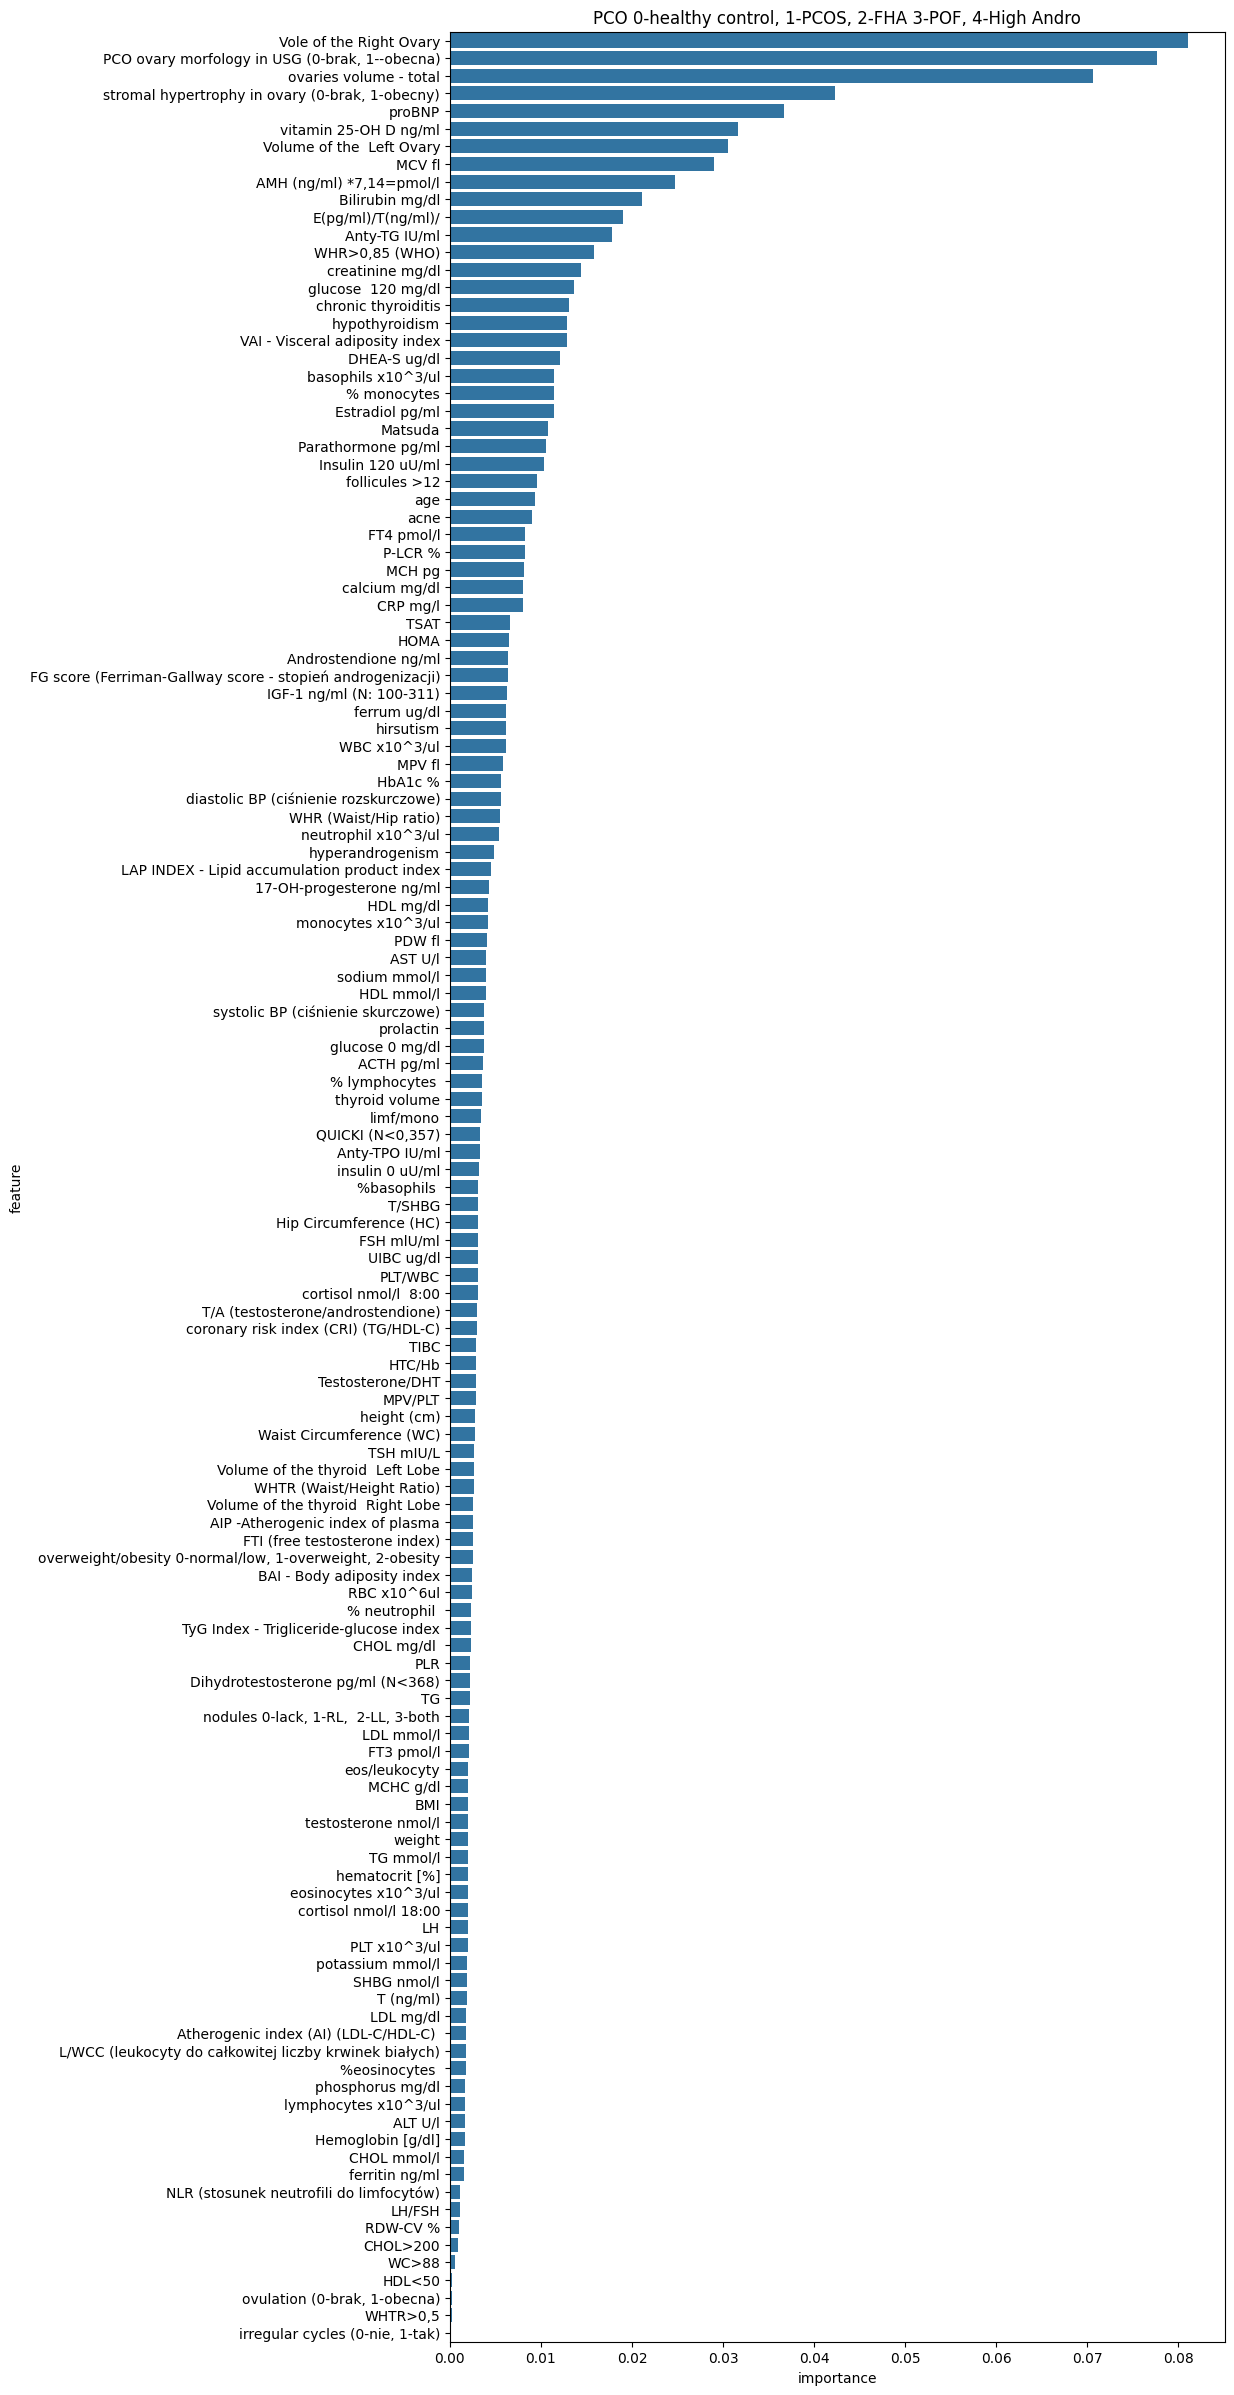

In [39]:
#  smote
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_rf)

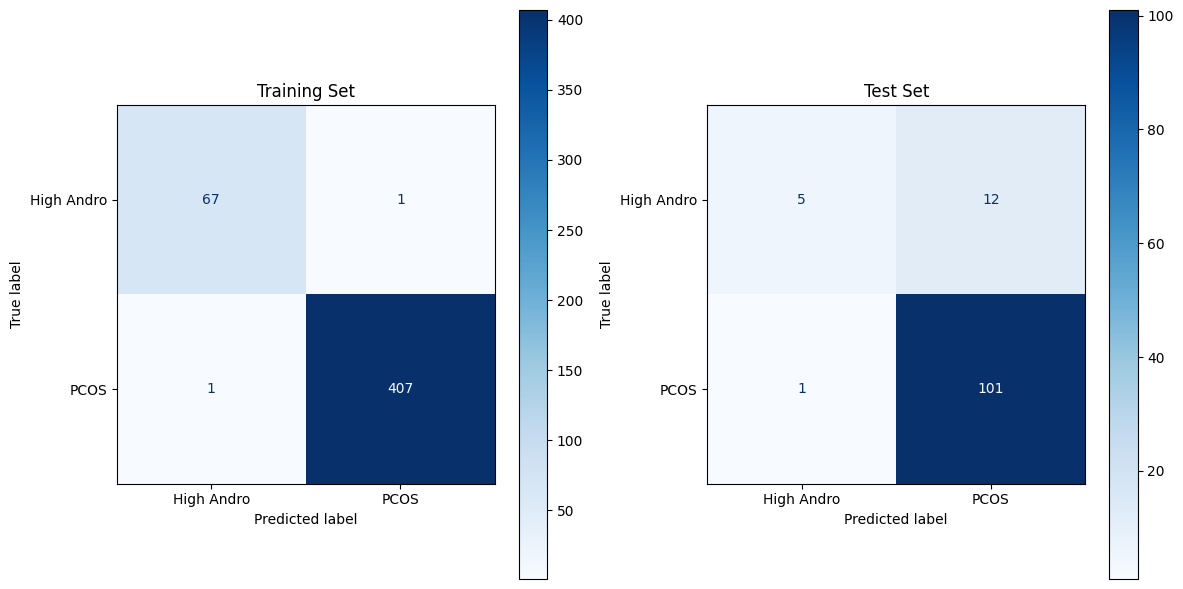

Training set
              precision    recall  f1-score   support

  High Andro       0.99      0.99      0.99        68
        PCOS       1.00      1.00      1.00       408

    accuracy                           1.00       476
   macro avg       0.99      0.99      0.99       476
weighted avg       1.00      1.00      1.00       476

Test set
              precision    recall  f1-score   support

  High Andro       0.83      0.29      0.43        17
        PCOS       0.89      0.99      0.94       102

    accuracy                           0.89       119
   macro avg       0.86      0.64      0.69       119
weighted avg       0.89      0.89      0.87       119



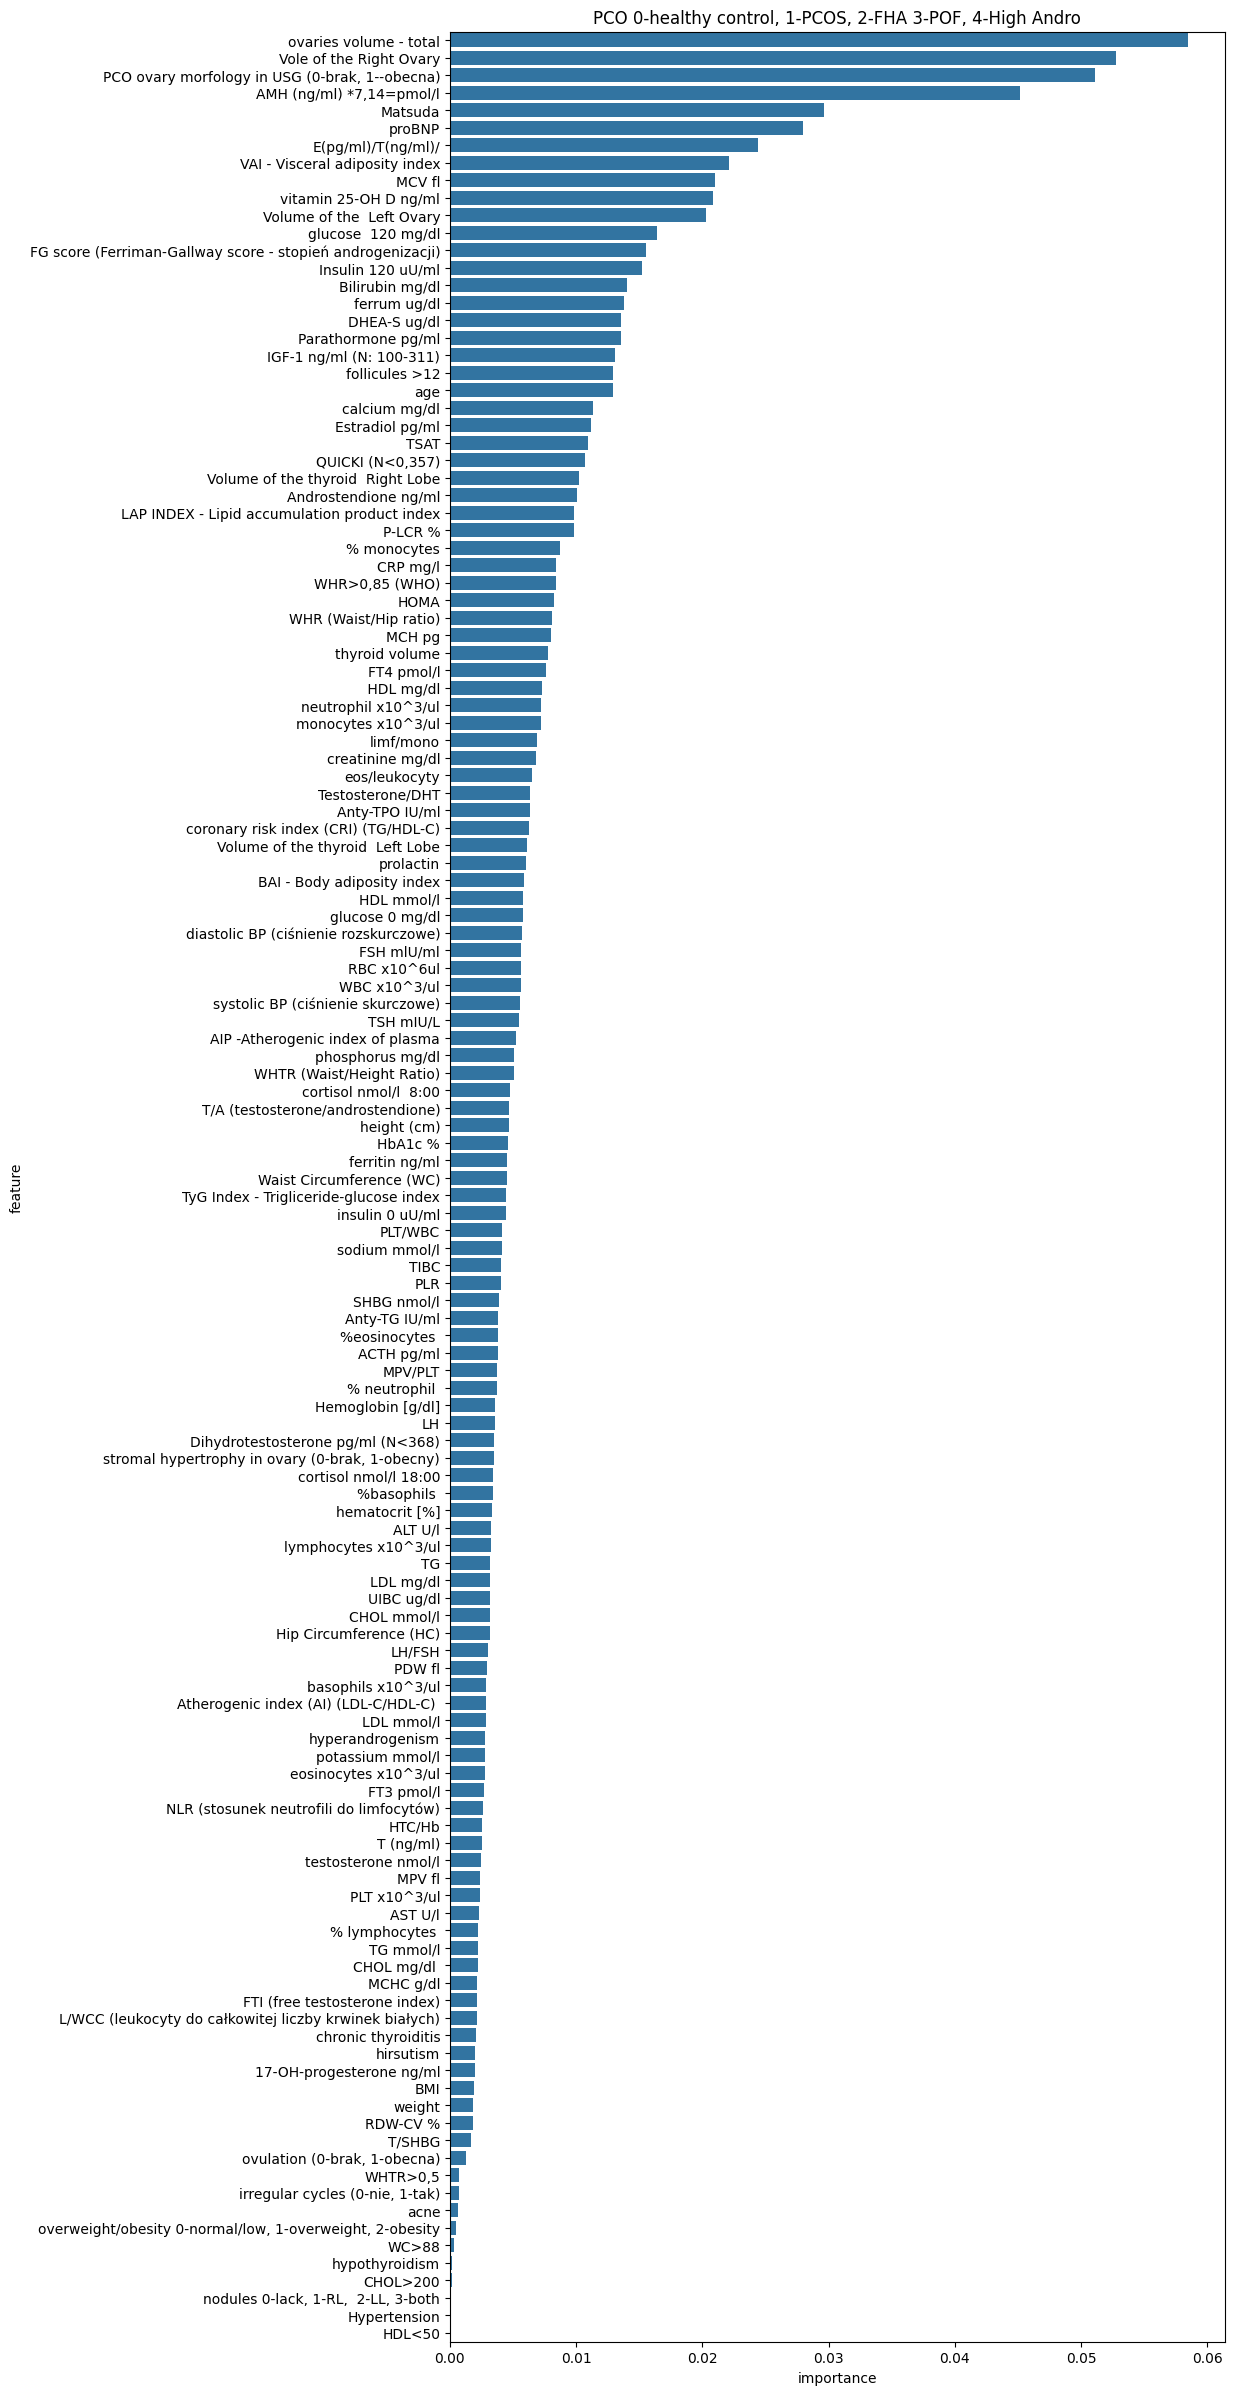

In [40]:
#  bez smote
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

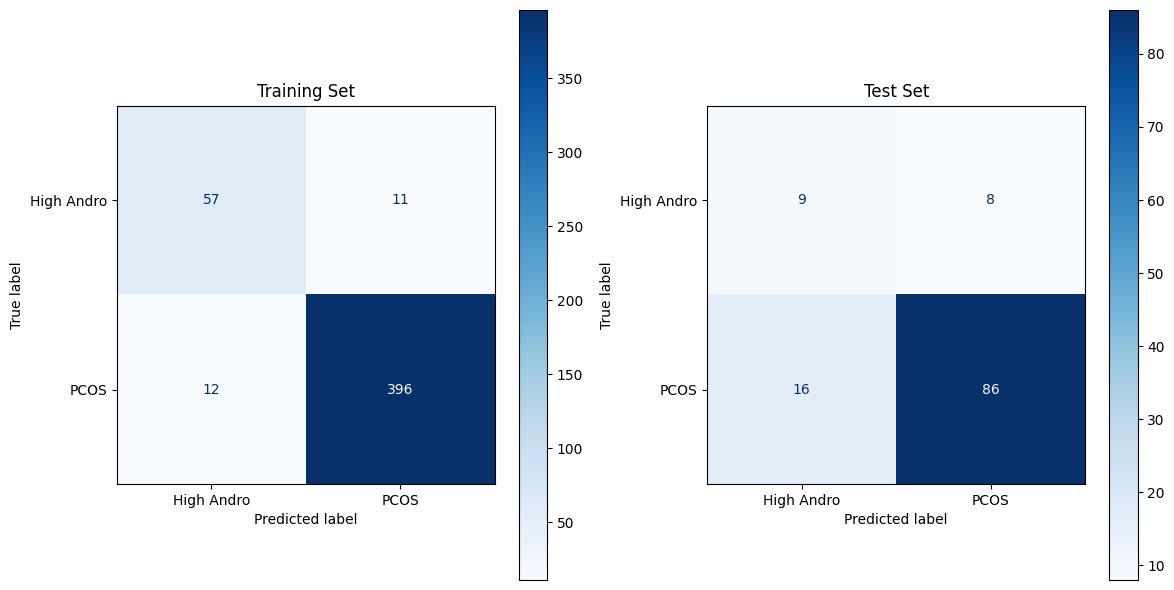

Training set
              precision    recall  f1-score   support

  High Andro       0.83      0.84      0.83        68
        PCOS       0.97      0.97      0.97       408

    accuracy                           0.95       476
   macro avg       0.90      0.90      0.90       476
weighted avg       0.95      0.95      0.95       476

Test set
              precision    recall  f1-score   support

  High Andro       0.36      0.53      0.43        17
        PCOS       0.91      0.84      0.88       102

    accuracy                           0.80       119
   macro avg       0.64      0.69      0.65       119
weighted avg       0.84      0.80      0.81       119



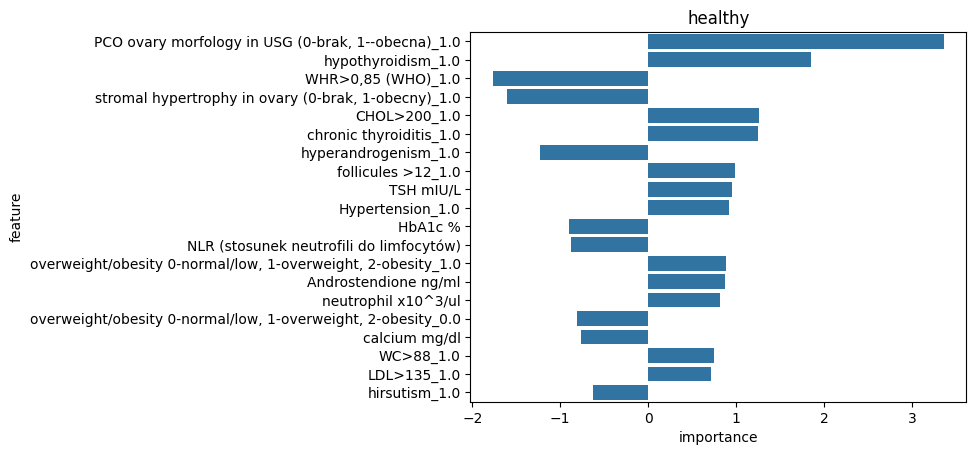

In [41]:
#  smote
model_lr = LogisticRegression(C=1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr  = validate_model_classification_smote(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_logistic_regressison)

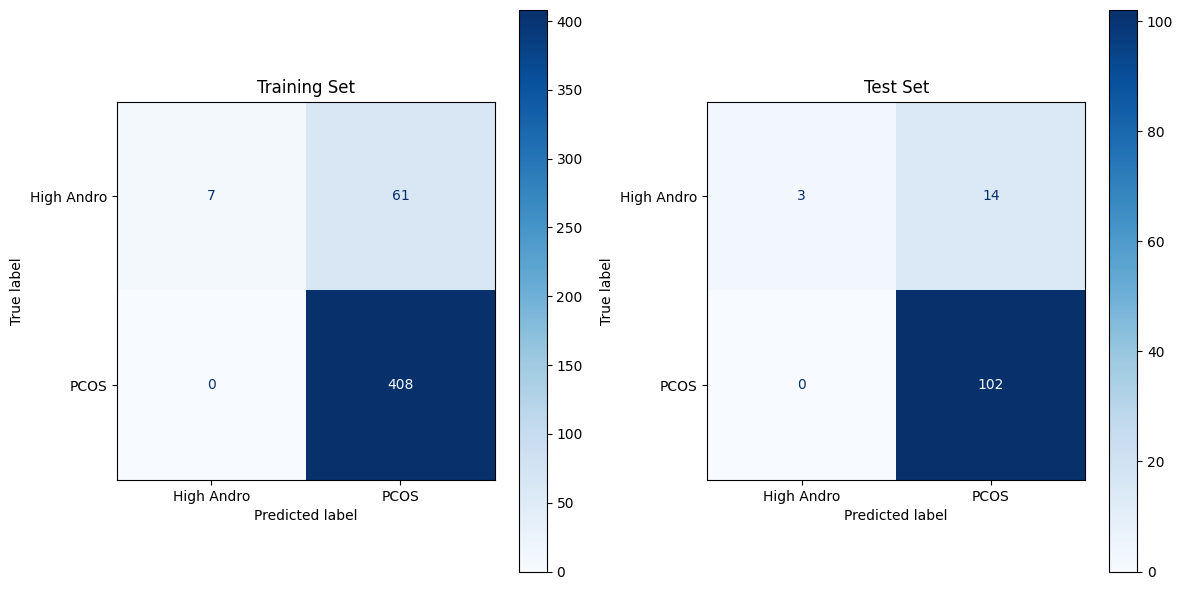

Training set
              precision    recall  f1-score   support

  High Andro       1.00      0.10      0.19        68
        PCOS       0.87      1.00      0.93       408

    accuracy                           0.87       476
   macro avg       0.93      0.55      0.56       476
weighted avg       0.89      0.87      0.82       476

Test set
              precision    recall  f1-score   support

  High Andro       1.00      0.18      0.30        17
        PCOS       0.88      1.00      0.94       102

    accuracy                           0.88       119
   macro avg       0.94      0.59      0.62       119
weighted avg       0.90      0.88      0.84       119



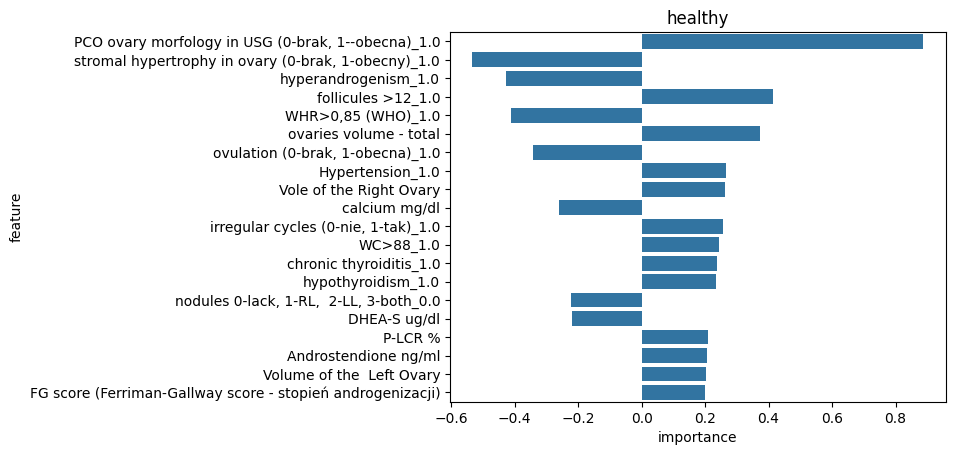

In [36]:
model_lr = LogisticRegression(C=1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [12]:
selected_features_map = {}

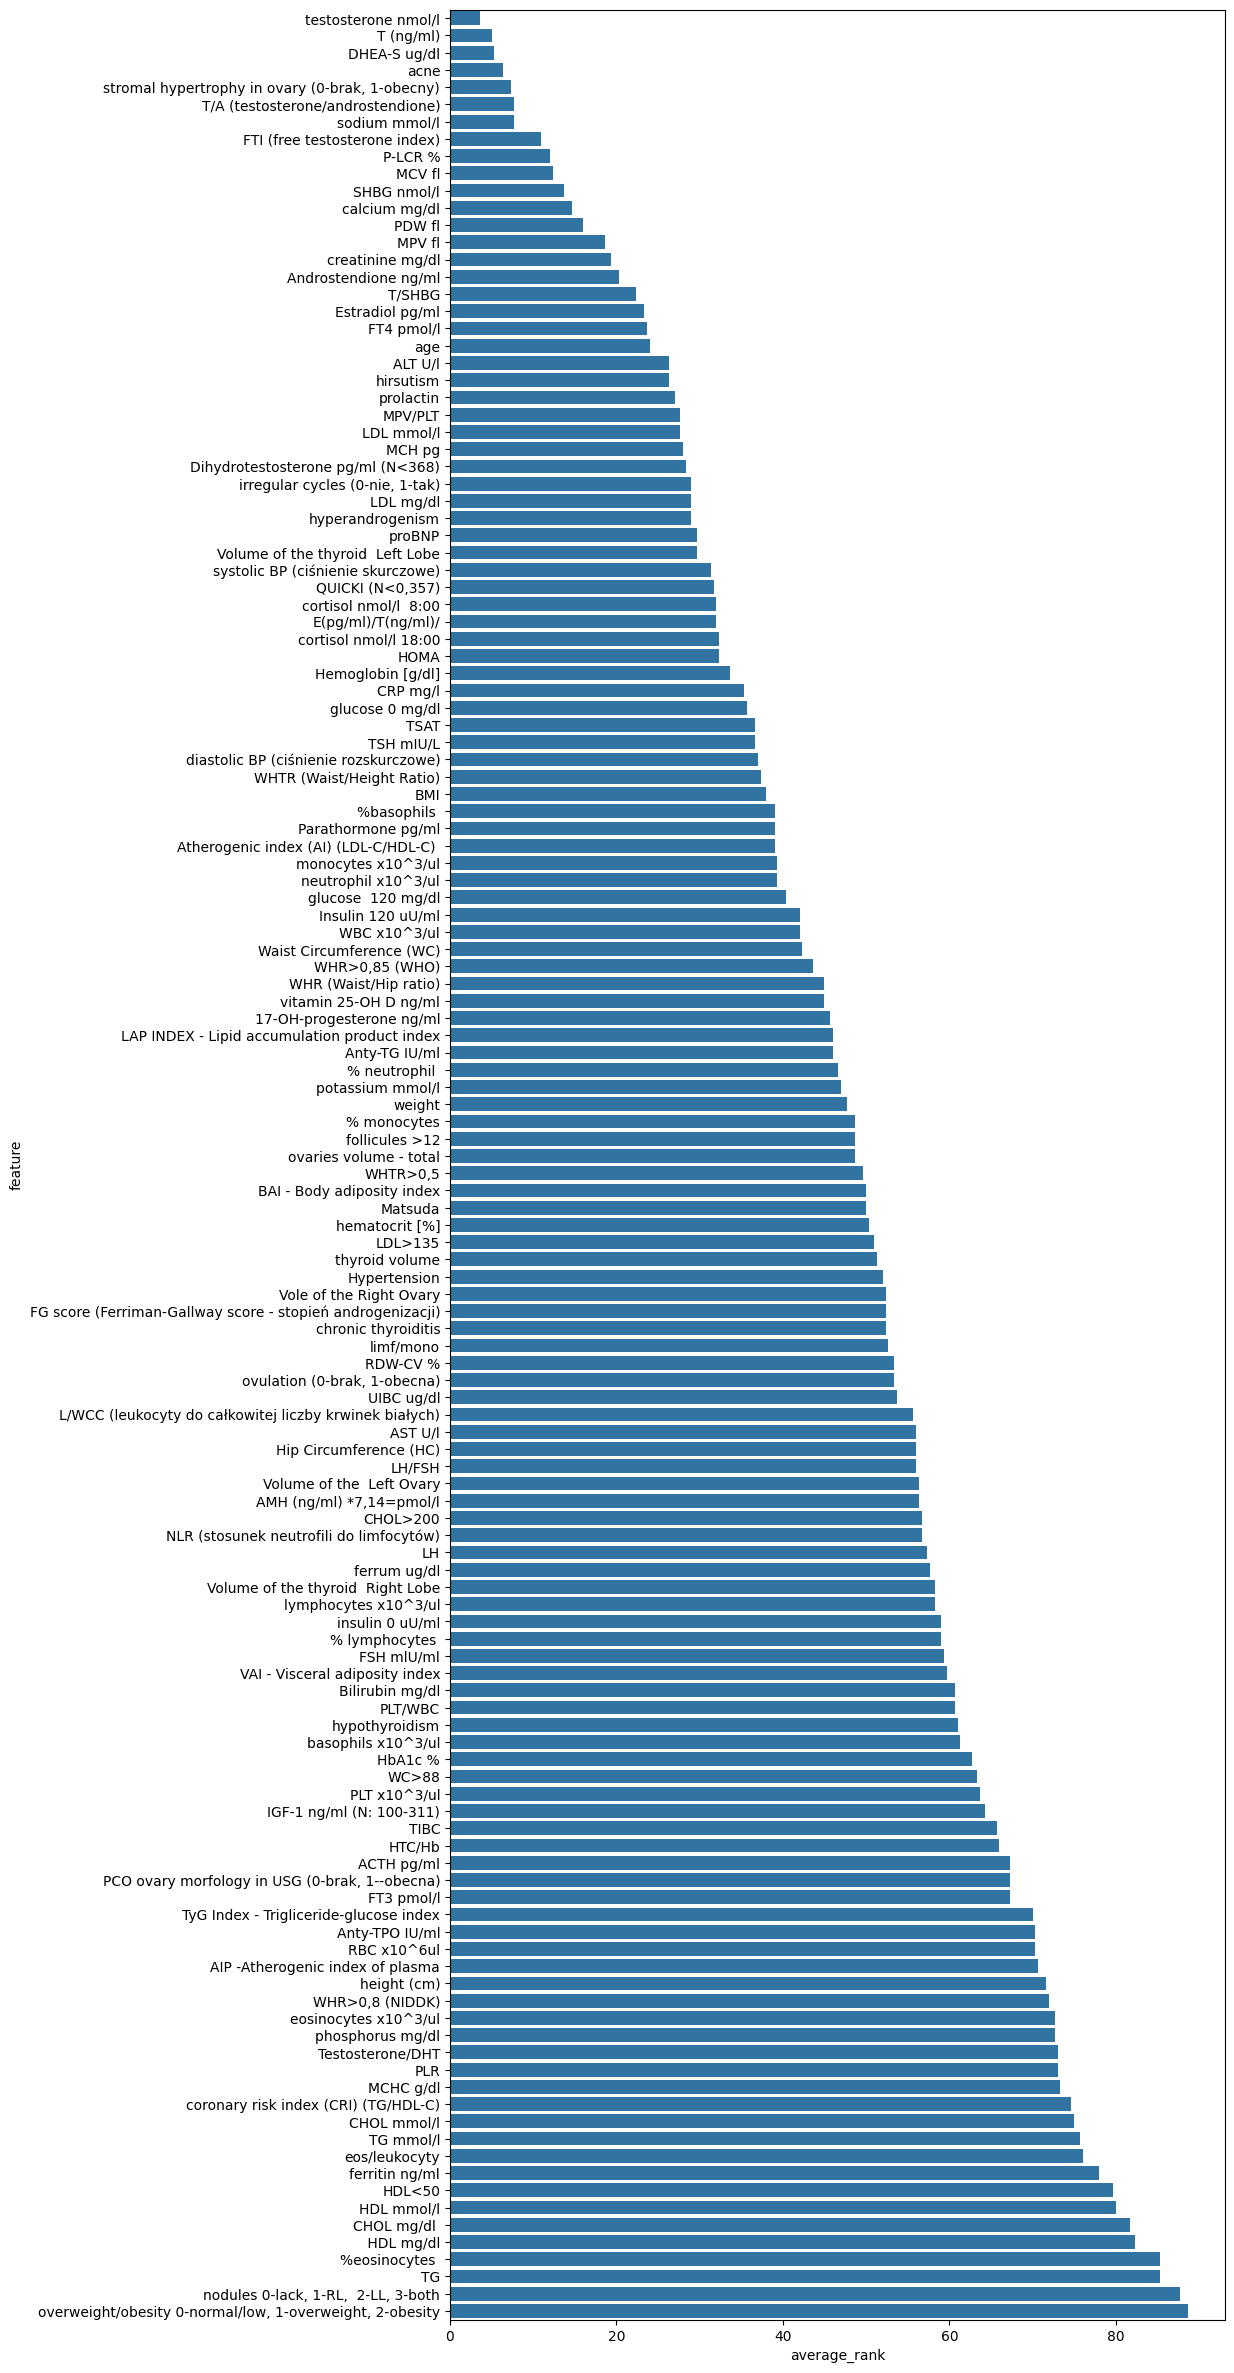

In [13]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [14]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 40] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 51 features:


['testosterone nmol/l',
 'T (ng/ml)',
 'DHEA-S ug/dl',
 'acne',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'T/A (testosterone/androstendione)',
 'sodium mmol/l',
 'FTI (free testosterone index)',
 'P-LCR %',
 'MCV fl',
 'SHBG nmol/l',
 'calcium mg/dl',
 'PDW fl',
 'MPV fl',
 'creatinine mg/dl',
 'Androstendione ng/ml',
 'T/SHBG',
 'Estradiol pg/ml',
 'FT4 pmol/l',
 'age',
 'ALT U/l',
 'hirsutism',
 'prolactin',
 'MPV/PLT',
 'LDL mmol/l',
 'MCH pg',
 'Dihydrotestosterone pg/ml (N<368)',
 'irregular cycles (0-nie, 1-tak)',
 'LDL mg/dl',
 'hyperandrogenism',
 'proBNP',
 'Volume of the thyroid  Left Lobe',
 'systolic BP (ciśnienie skurczowe)',
 'QUICKI (N<0,357)',
 'cortisol nmol/l  8:00',
 'E(pg/ml)/T(ng/ml)/',
 'cortisol nmol/l 18:00',
 'HOMA',
 'Hemoglobin [g/dl]',
 'CRP mg/l',
 'glucose 0 mg/dl',
 'TSAT',
 'TSH mIU/L',
 'diastolic BP (ciśnienie rozskurczowe)',
 'WHTR (Waist/Height Ratio)',
 'BMI',
 '%basophils ',
 'Parathormone pg/ml',
 'Atherogenic index (AI) (LDL-C/HDL-C) '

## Feature selection

### Chi 2

Selected 29 features


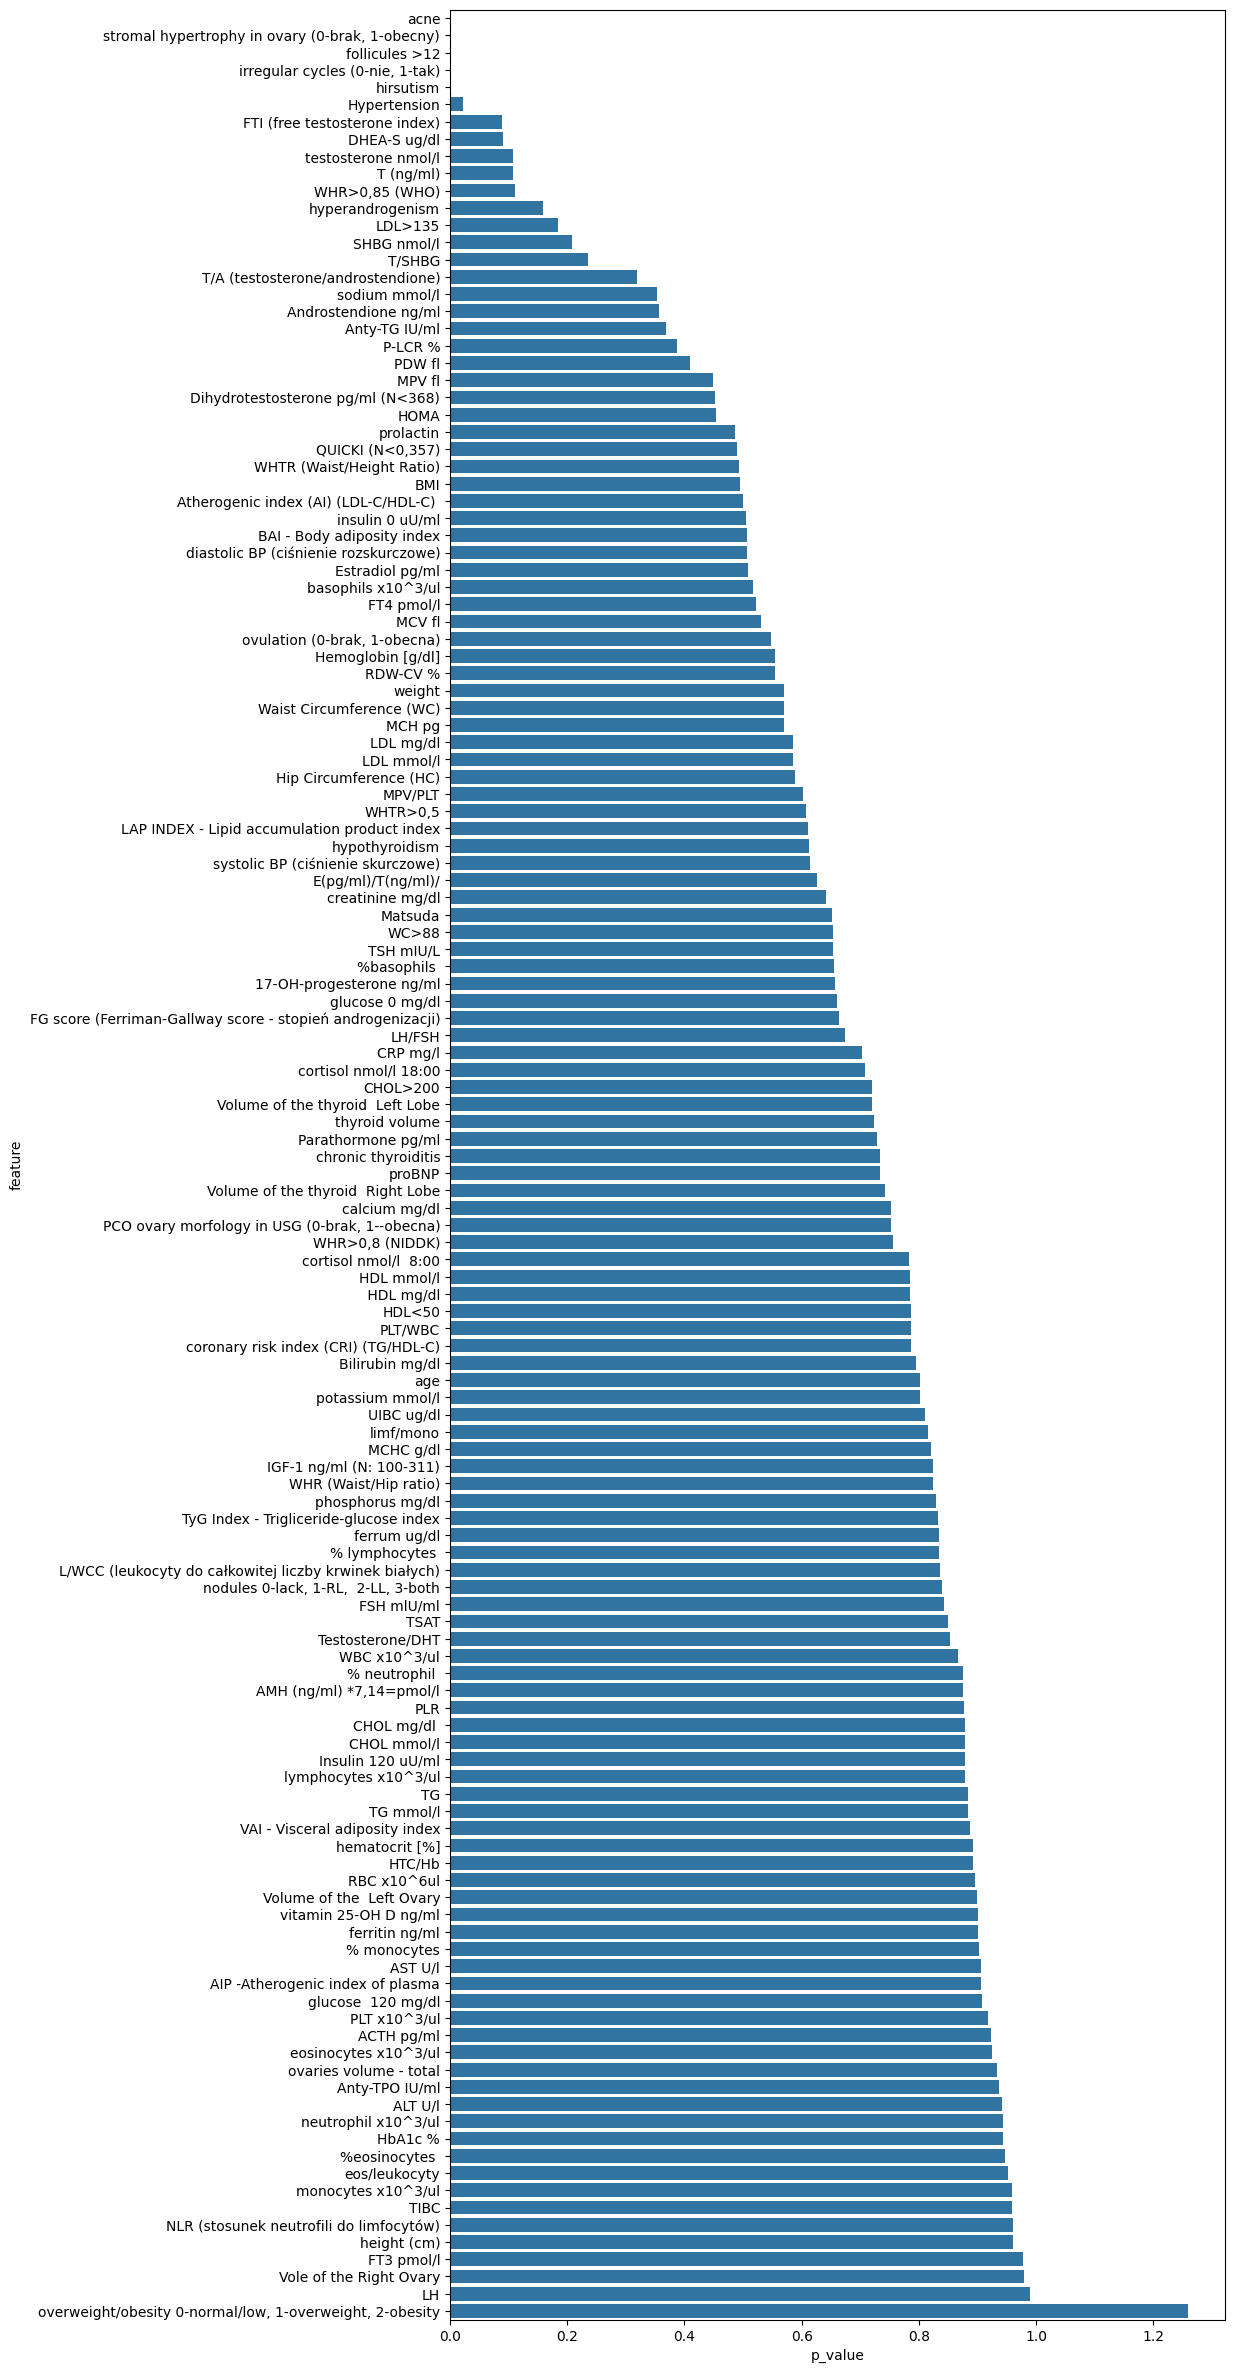

['acne',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'follicules >12',
 'irregular cycles (0-nie, 1-tak)',
 'hirsutism',
 'Hypertension',
 'FTI (free testosterone index)',
 'DHEA-S ug/dl',
 'testosterone nmol/l',
 'T (ng/ml)',
 'WHR>0,85 (WHO)',
 'hyperandrogenism',
 'LDL>135',
 'SHBG nmol/l',
 'T/SHBG',
 'T/A (testosterone/androstendione)',
 'sodium mmol/l',
 'Androstendione ng/ml',
 'Anty-TG IU/ml',
 'P-LCR %',
 'PDW fl',
 'MPV fl',
 'Dihydrotestosterone pg/ml (N<368)',
 'HOMA',
 'prolactin',
 'QUICKI (N<0,357)',
 'WHTR (Waist/Height Ratio)',
 'BMI',
 'Atherogenic index (AI) (LDL-C/HDL-C) ']

In [15]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k=15), PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=0.5)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

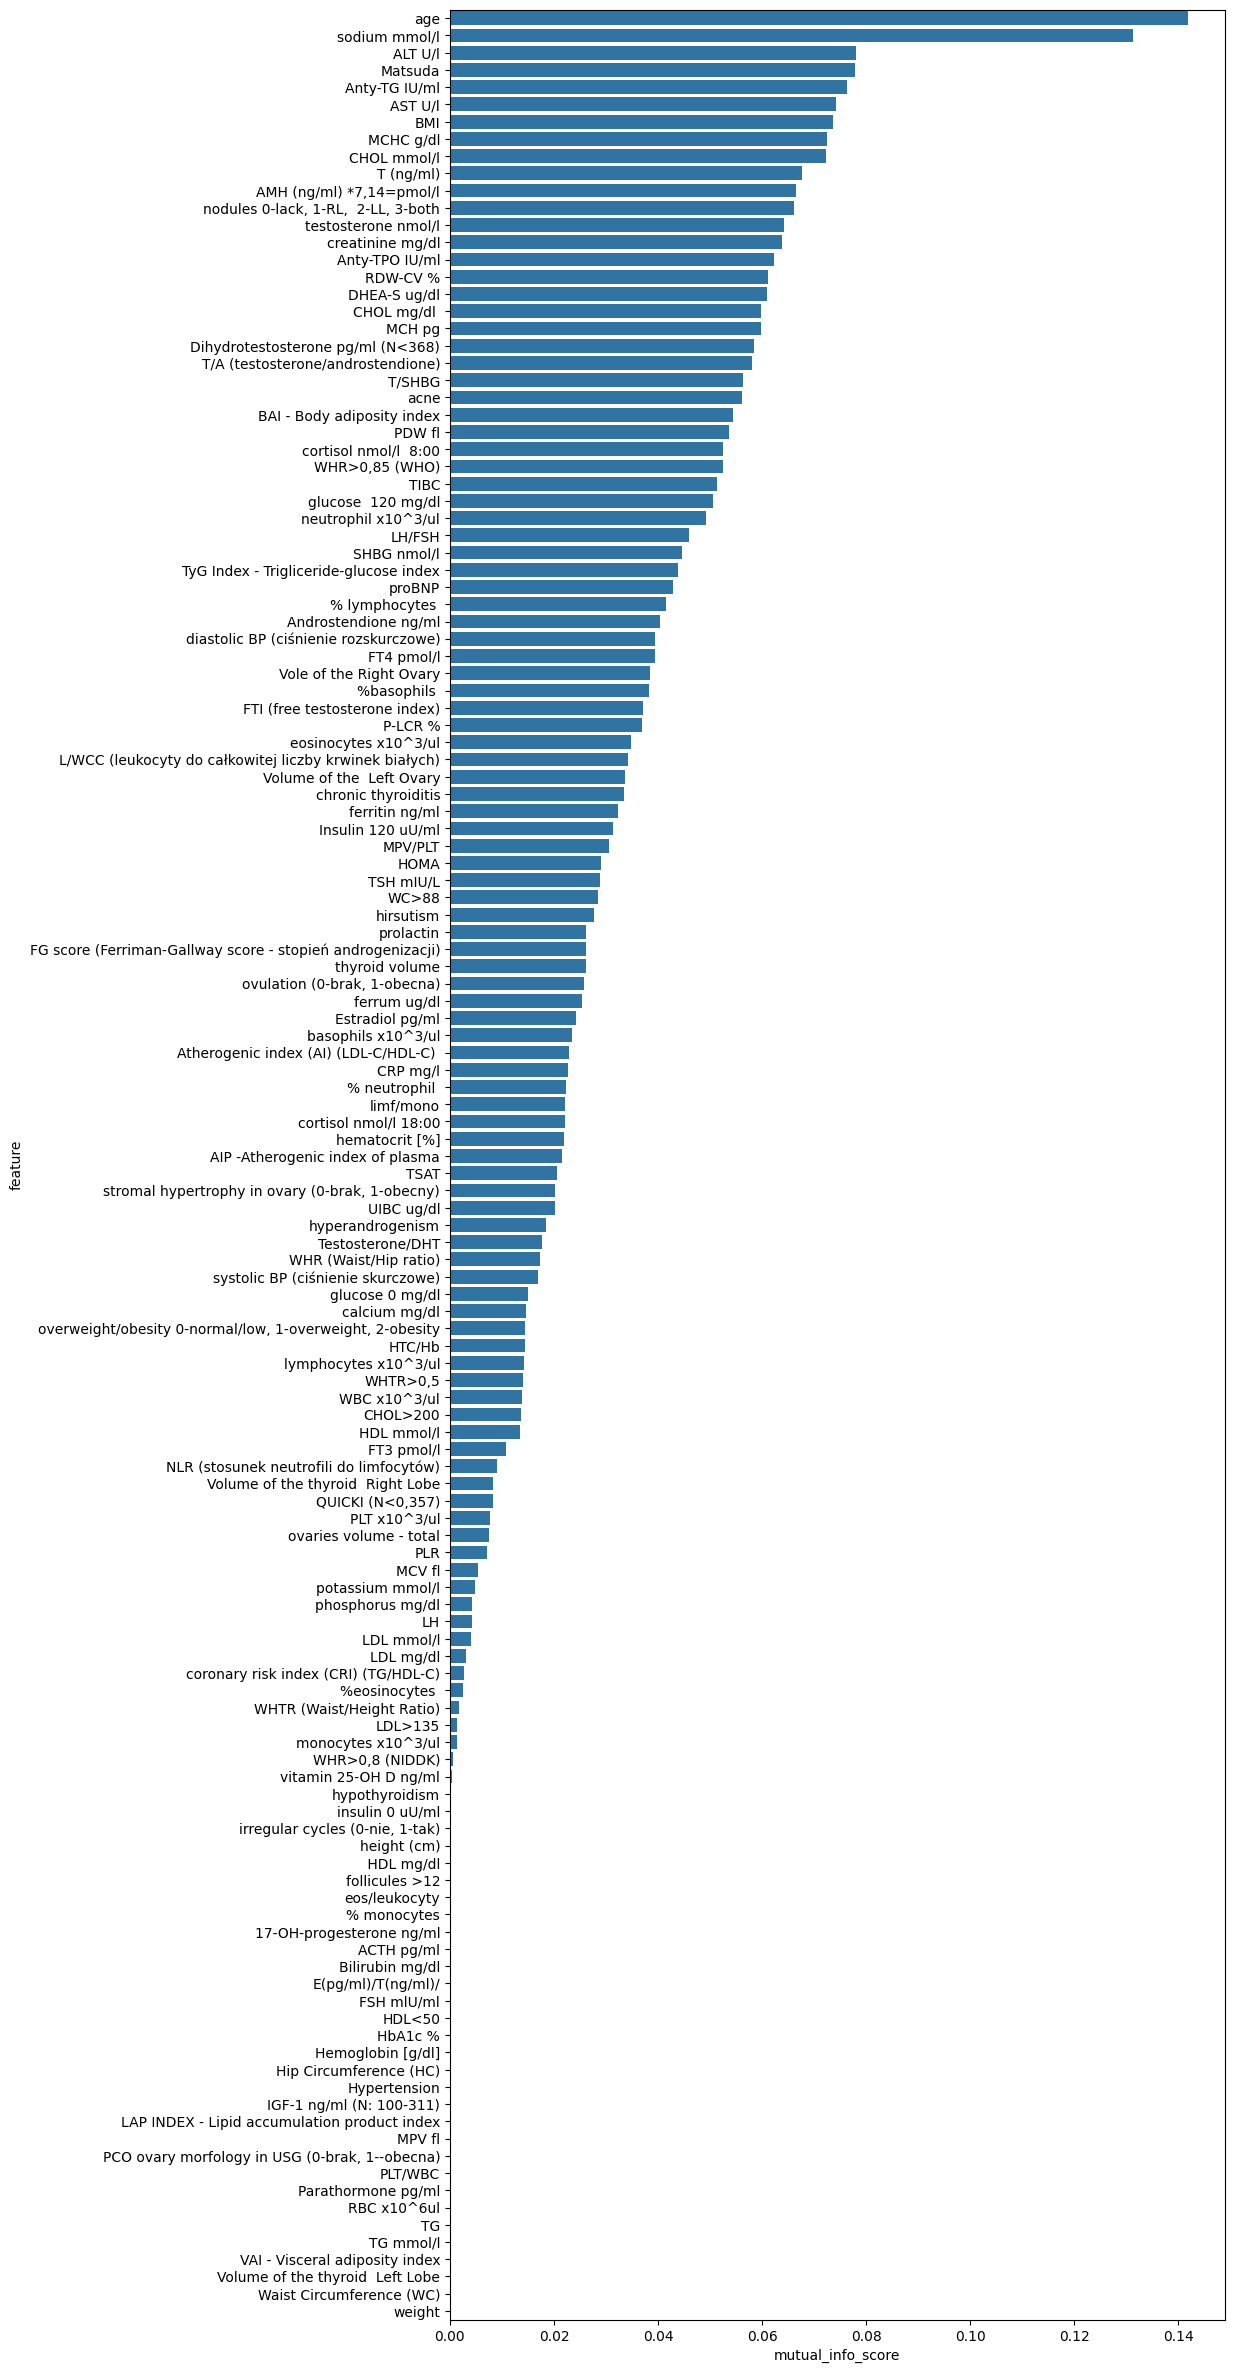

Selected 91 features


In [16]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, PCO, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

Optimal number of features: 55


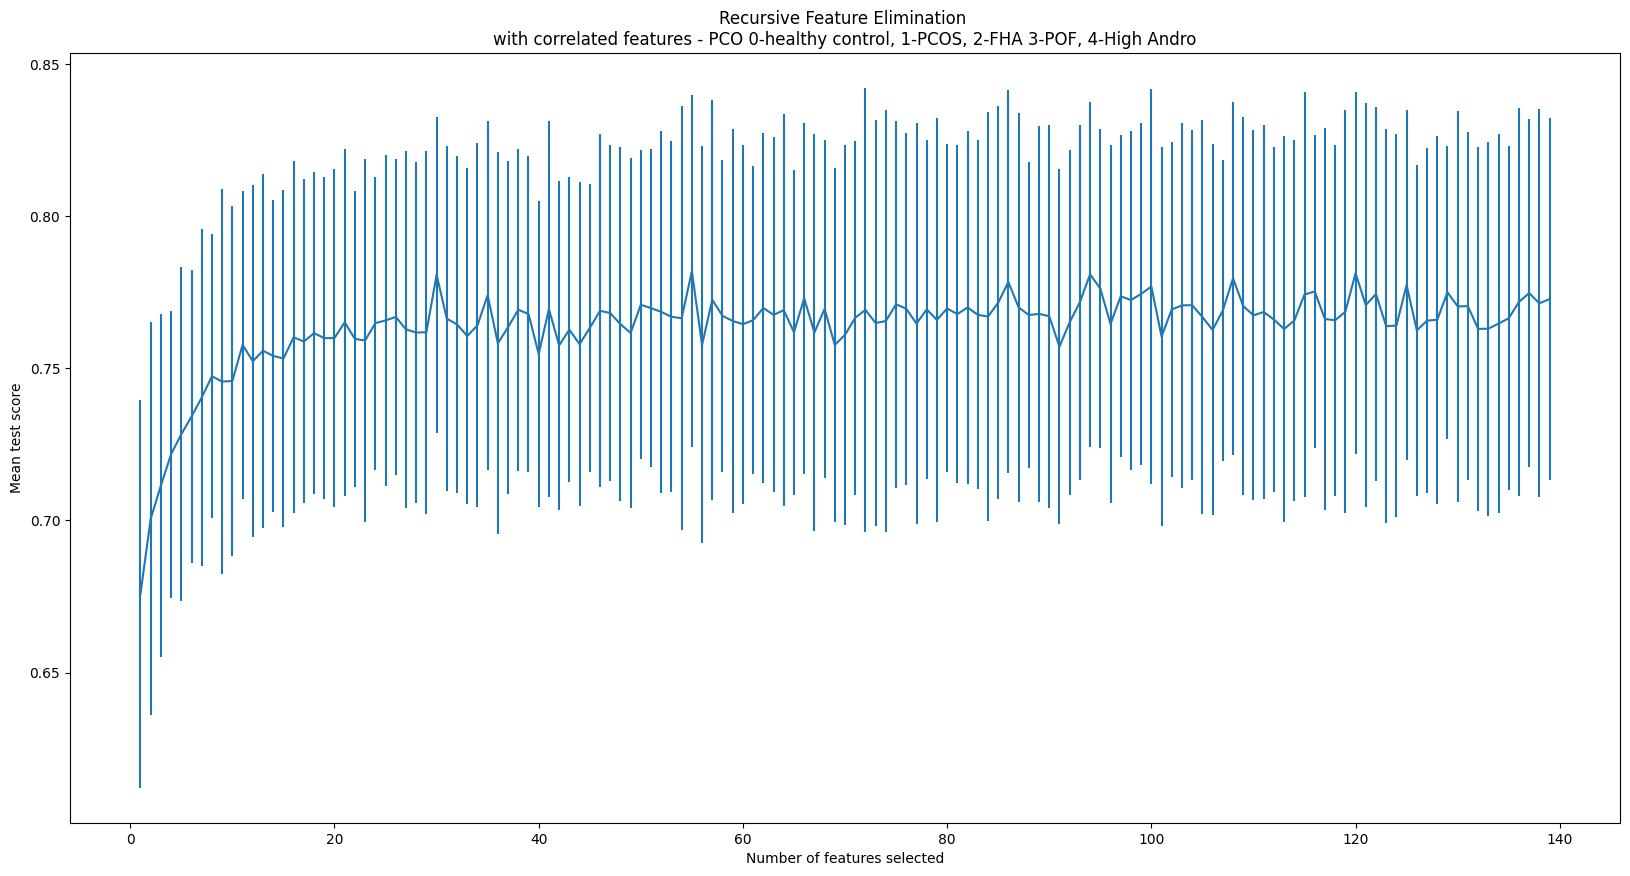

['SHBG nmol/l',
 'limf/mono',
 'Hemoglobin [g/dl]',
 'hematocrit [%]',
 'WBC x10^3/ul',
 'glucose  120 mg/dl',
 'LDL mg/dl',
 'LDL mmol/l',
 'ferrum ug/dl',
 'diastolic BP (ciśnienie rozskurczowe)',
 'LH/FSH',
 'creatinine mg/dl',
 'MCV fl',
 'MPV fl',
 'MPV/PLT',
 'HOMA',
 'Matsuda',
 'cortisol nmol/l 18:00',
 'PDW fl',
 'Parathormone pg/ml',
 'cortisol nmol/l  8:00',
 'calcium mg/dl',
 'T (ng/ml)',
 'T/A (testosterone/androstendione)',
 'T/SHBG',
 'TIBC',
 'age',
 'acne',
 'VAI - Visceral adiposity index',
 'Volume of the  Left Ovary',
 'Volume of the thyroid  Left Lobe',
 'P-LCR %',
 'lymphocytes x10^3/ul',
 'glucose 0 mg/dl',
 'FTI (free testosterone index)',
 'testosterone nmol/l',
 'systolic BP (ciśnienie skurczowe)',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'AIP -Atherogenic index of plasma',
 'ALT U/l',
 'sodium mmol/l',
 'Androstendione ng/ml',
 'prolactin',
 'proBNP',
 'Bilirubin mg/dl',
 'potassium mmol/l',
 'phosphorus mg/dl',
 'WHR (Waist/Hip ratio)',
 'DHEA-S 

In [17]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, PCO, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

Selected 132 features


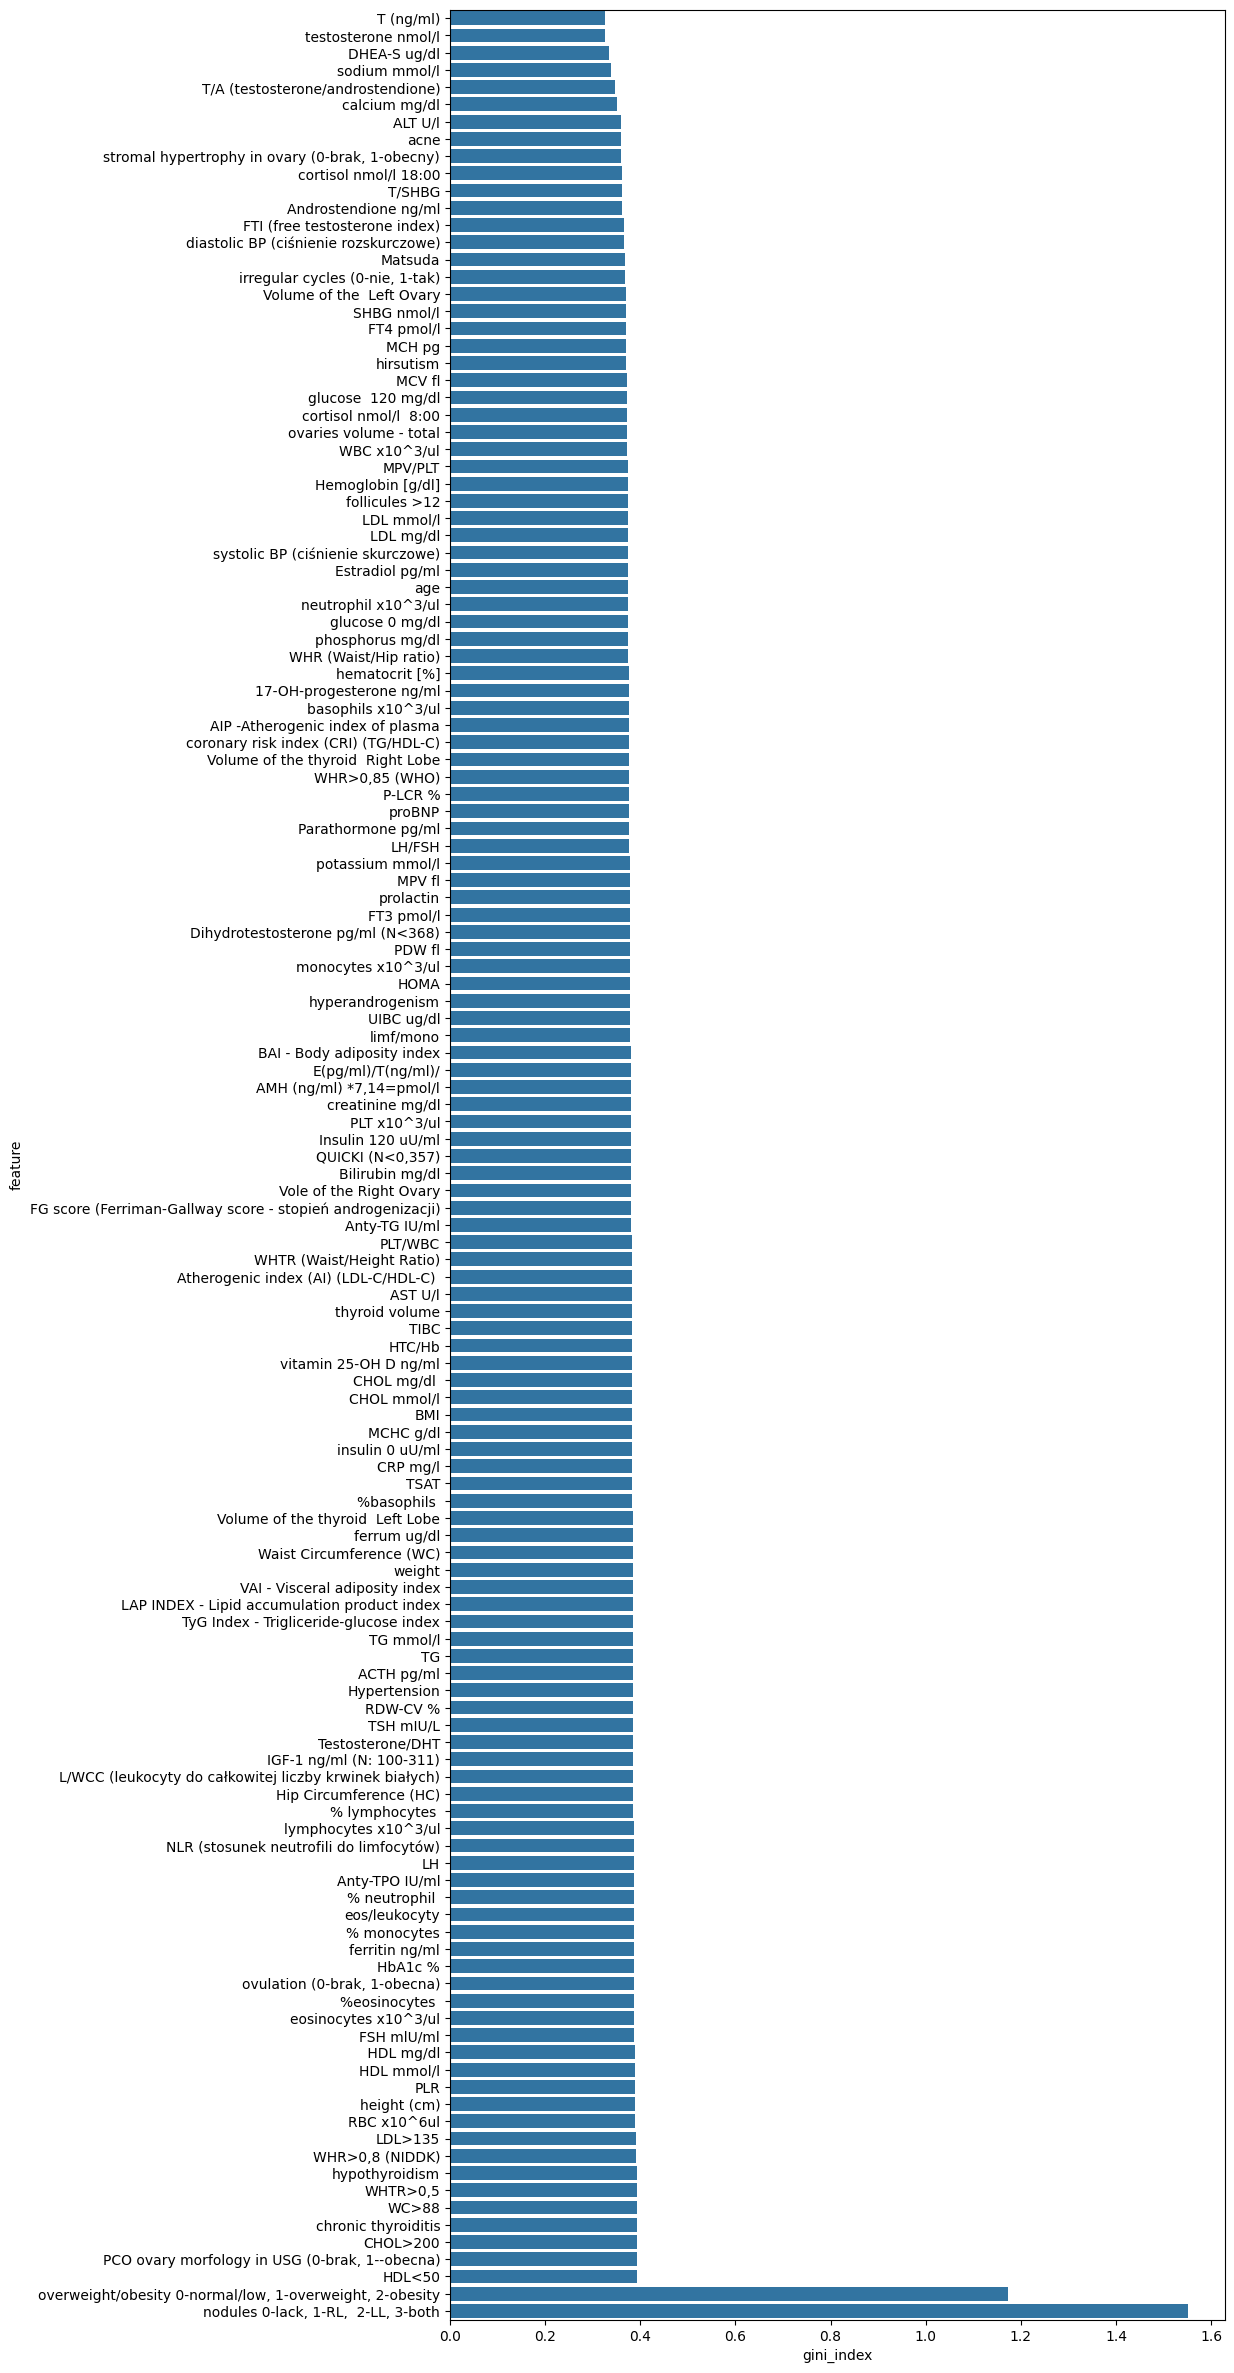

['T (ng/ml)',
 'testosterone nmol/l',
 'DHEA-S ug/dl',
 'sodium mmol/l',
 'T/A (testosterone/androstendione)',
 'calcium mg/dl',
 'ALT U/l',
 'acne',
 'stromal hypertrophy in ovary (0-brak, 1-obecny)',
 'cortisol nmol/l 18:00',
 'T/SHBG',
 'Androstendione ng/ml',
 'FTI (free testosterone index)',
 'diastolic BP (ciśnienie rozskurczowe)',
 'Matsuda',
 'irregular cycles (0-nie, 1-tak)',
 'Volume of the  Left Ovary',
 'SHBG nmol/l',
 'FT4 pmol/l',
 'MCH pg',
 'hirsutism',
 'MCV fl',
 'glucose  120 mg/dl',
 'cortisol nmol/l  8:00',
 'ovaries volume - total',
 'WBC x10^3/ul',
 'MPV/PLT',
 'Hemoglobin [g/dl]',
 'follicules >12',
 'LDL mmol/l',
 'LDL mg/dl',
 'systolic BP (ciśnienie skurczowe)',
 'Estradiol pg/ml',
 'age',
 'neutrophil x10^3/ul',
 'glucose 0 mg/dl',
 'phosphorus mg/dl',
 'WHR (Waist/Hip ratio)',
 'hematocrit [%]',
 '17-OH-progesterone ng/ml',
 'basophils x10^3/ul',
 'AIP -Atherogenic index of plasma',
 'coronary risk index (CRI) (TG/HDL-C)',
 'Volume of the thyroid  Right Lob

In [18]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

selected 82 features


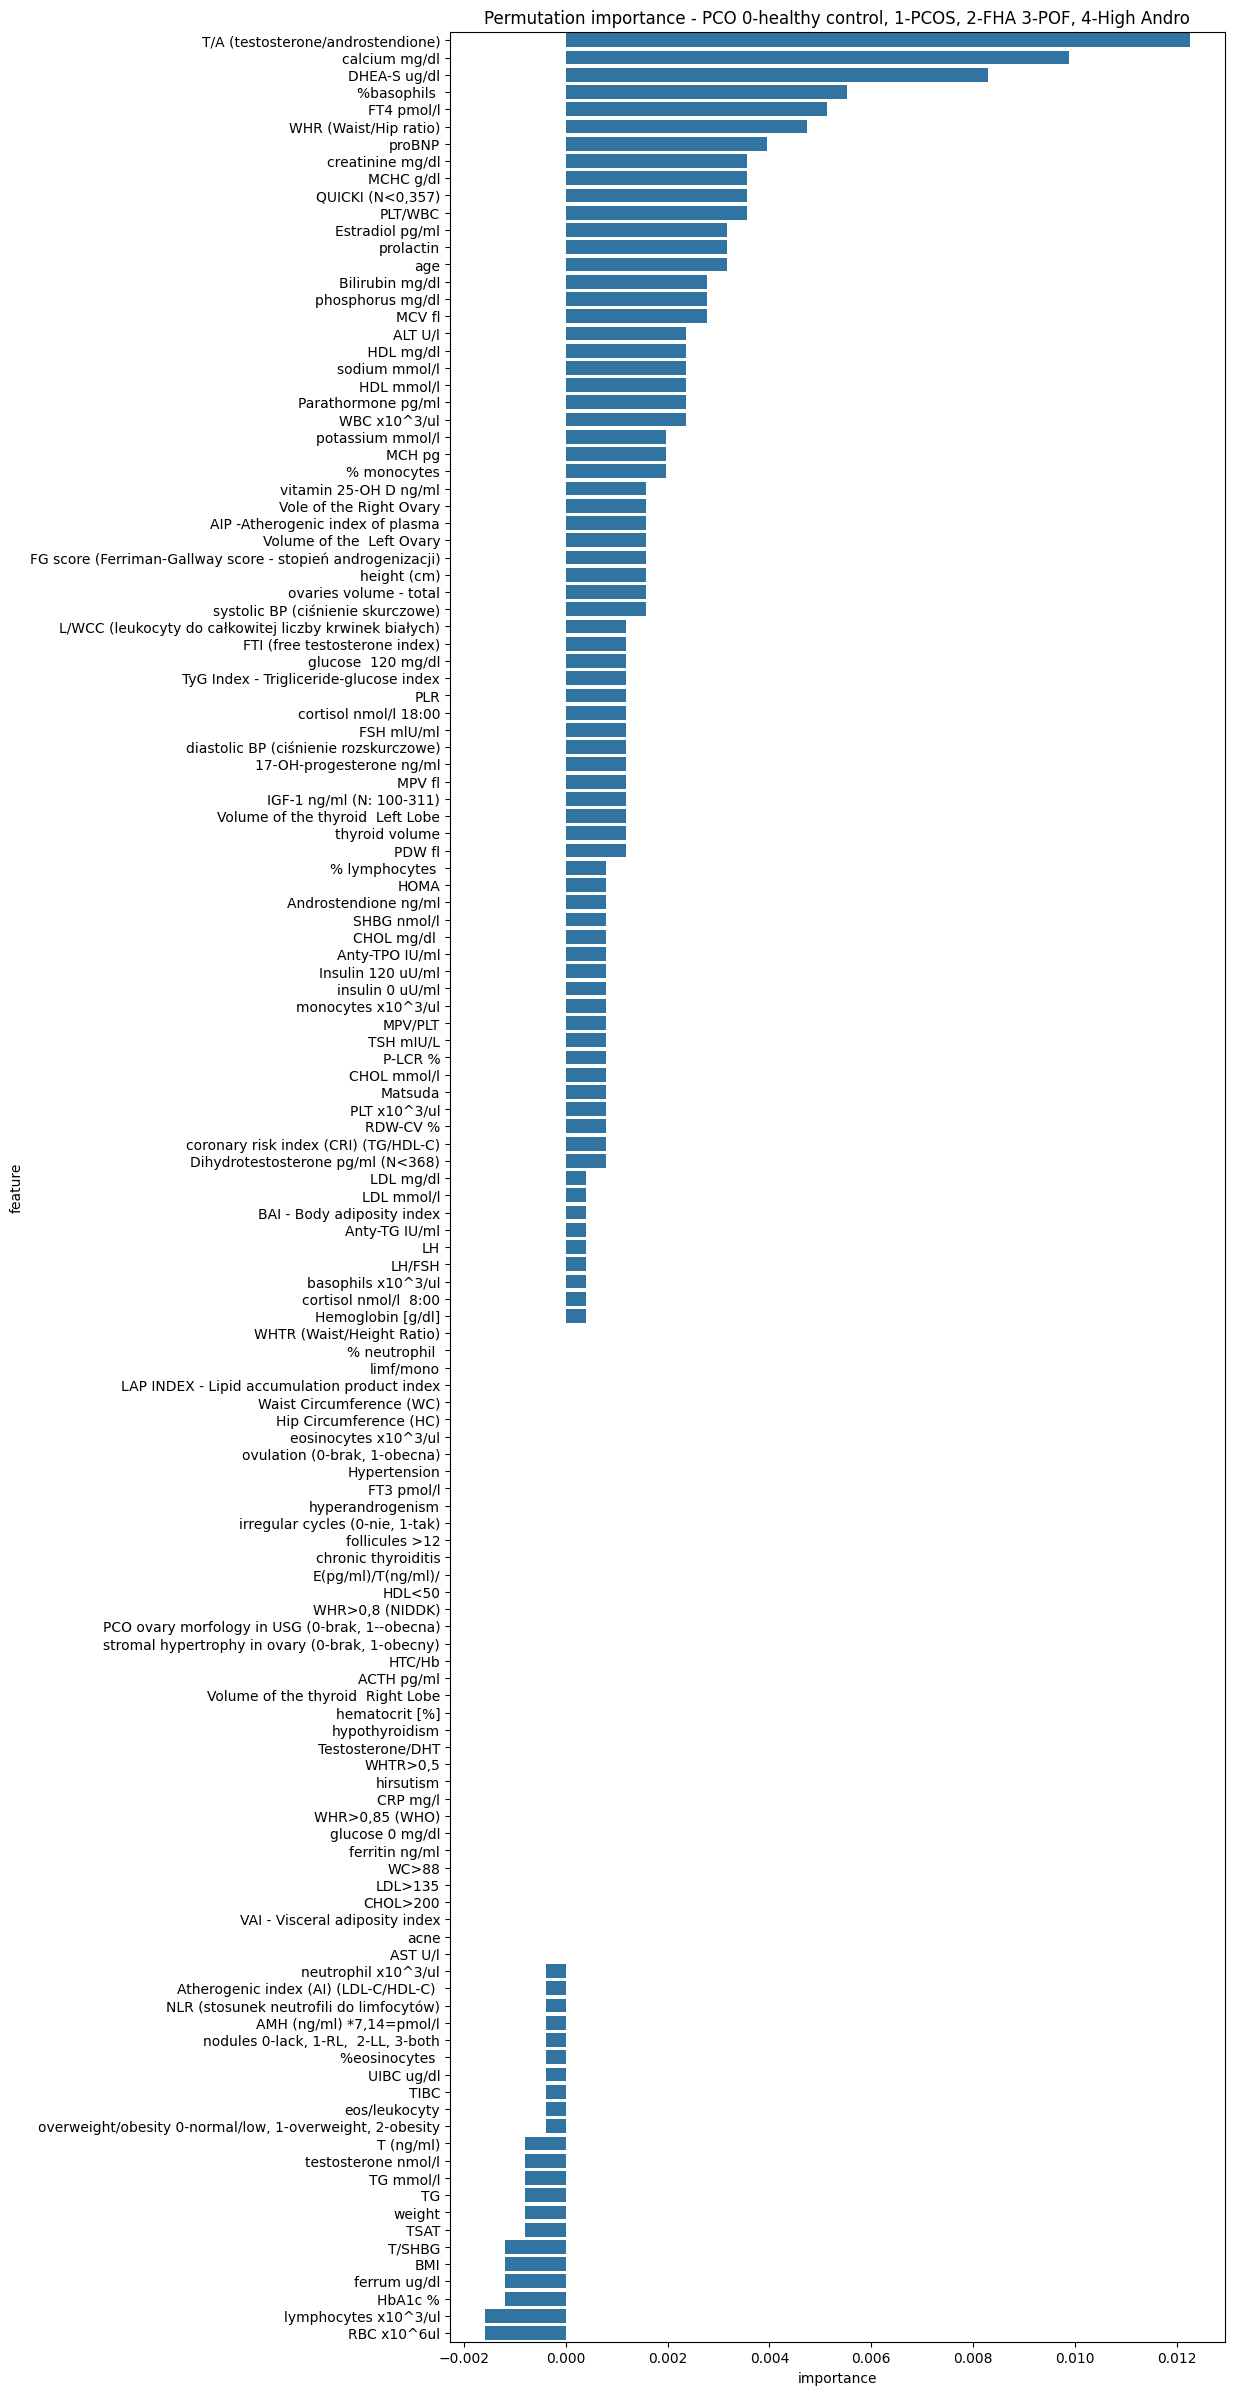

Actually selected 5 features


In [19]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, PCO)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0.005]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [20]:
selected_features_map

{'average_rank': ['testosterone nmol/l',
  'T (ng/ml)',
  'DHEA-S ug/dl',
  'acne',
  'stromal hypertrophy in ovary (0-brak, 1-obecny)',
  'T/A (testosterone/androstendione)',
  'sodium mmol/l',
  'FTI (free testosterone index)',
  'P-LCR %',
  'MCV fl',
  'SHBG nmol/l',
  'calcium mg/dl',
  'PDW fl',
  'MPV fl',
  'creatinine mg/dl',
  'Androstendione ng/ml',
  'T/SHBG',
  'Estradiol pg/ml',
  'FT4 pmol/l',
  'age',
  'ALT U/l',
  'hirsutism',
  'prolactin',
  'MPV/PLT',
  'LDL mmol/l',
  'MCH pg',
  'Dihydrotestosterone pg/ml (N<368)',
  'irregular cycles (0-nie, 1-tak)',
  'LDL mg/dl',
  'hyperandrogenism',
  'proBNP',
  'Volume of the thyroid  Left Lobe',
  'systolic BP (ciśnienie skurczowe)',
  'QUICKI (N<0,357)',
  'cortisol nmol/l  8:00',
  'E(pg/ml)/T(ng/ml)/',
  'cortisol nmol/l 18:00',
  'HOMA',
  'Hemoglobin [g/dl]',
  'CRP mg/l',
  'glucose 0 mg/dl',
  'TSAT',
  'TSH mIU/L',
  'diastolic BP (ciśnienie rozskurczowe)',
  'WHTR (Waist/Height Ratio)',
  'BMI',
  '%basophils ',


In [21]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

2
['T/A (testosterone/androstendione)', 'DHEA-S ug/dl']


0
0  T/A (testosterone/androstendione)
1                       DHEA-S ug/dl

In [22]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

108
['thyroid volume', 'MCH pg', 'DHEA-S ug/dl', 'hematocrit [%]', 'FT3 pmol/l', 'PLR', 'AST U/l', 'VAI - Visceral adiposity index', 'Anty-TG IU/ml', 'CRP mg/l', 'WBC x10^3/ul', 'glucose 0 mg/dl', 'systolic BP (ciśnienie skurczowe)', 'cortisol nmol/l  8:00', 'TSH mIU/L', 'Insulin 120 uU/ml', 'WHR>0,85 (WHO)', 'HDL mmol/l', 'TSAT', '% lymphocytes ', 'MCV fl', 'T/A (testosterone/androstendione)', 'Volume of the thyroid  Right Lobe', 'FG score (Ferriman-Gallway score - stopień androgenizacji)', 'NLR (stosunek neutrofili do limfocytów)', 'Vole of the Right Ovary', 'T/SHBG', 'CHOL>200', 'ovaries volume - total', 'eosinocytes x10^3/ul', 'chronic thyroiditis', 'Volume of the thyroid  Left Lobe', 'nodules 0-lack, 1-RL,  2-LL, 3-both', 'Androstendione ng/ml', 'proBNP', 'Hemoglobin [g/dl]', 'WHR (Waist/Hip ratio)', 'Parathormone pg/ml', 'ALT U/l', 'Hypertension', 'ferrum ug/dl', 'LDL mmol/l', 'glucose  120 mg/dl', 'Bilirubin mg/dl', 'follicules >12', 'WHTR>0,5', 'UIBC ug/dl', 'E(pg/ml)/T(ng/ml)/

## Test the narrowed down feature space

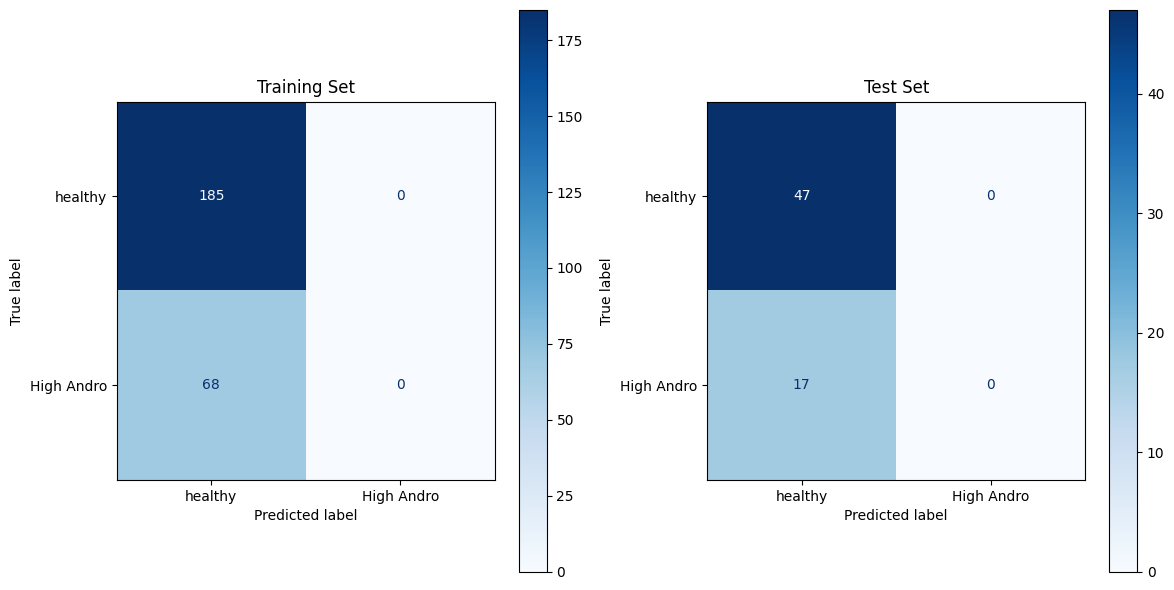

Training set
              precision    recall  f1-score   support

     healthy       0.73      1.00      0.84       185
  High Andro       0.00      0.00      0.00        68

    accuracy                           0.73       253
   macro avg       0.37      0.50      0.42       253
weighted avg       0.53      0.73      0.62       253

Test set
              precision    recall  f1-score   support

     healthy       0.73      1.00      0.85        47
  High Andro       0.00      0.00      0.00        17

    accuracy                           0.73        64
   macro avg       0.37      0.50      0.42        64
weighted avg       0.54      0.73      0.62        64



c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and be

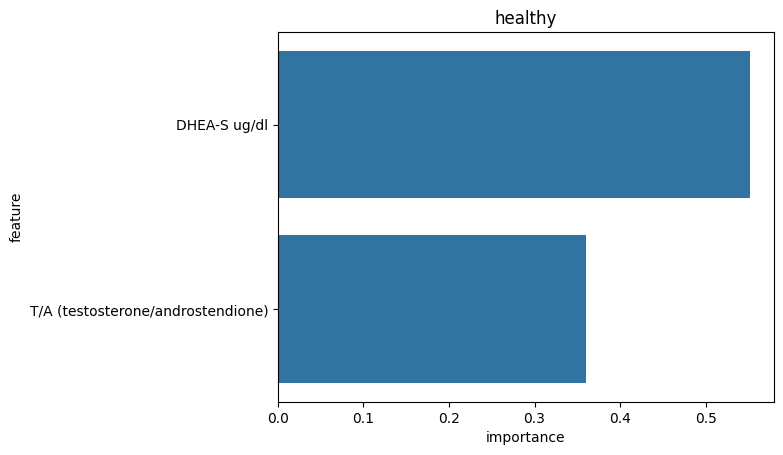

In [28]:
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

In [25]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, min_samples_split=6, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

ValueError: A given column is not a column of the dataframe

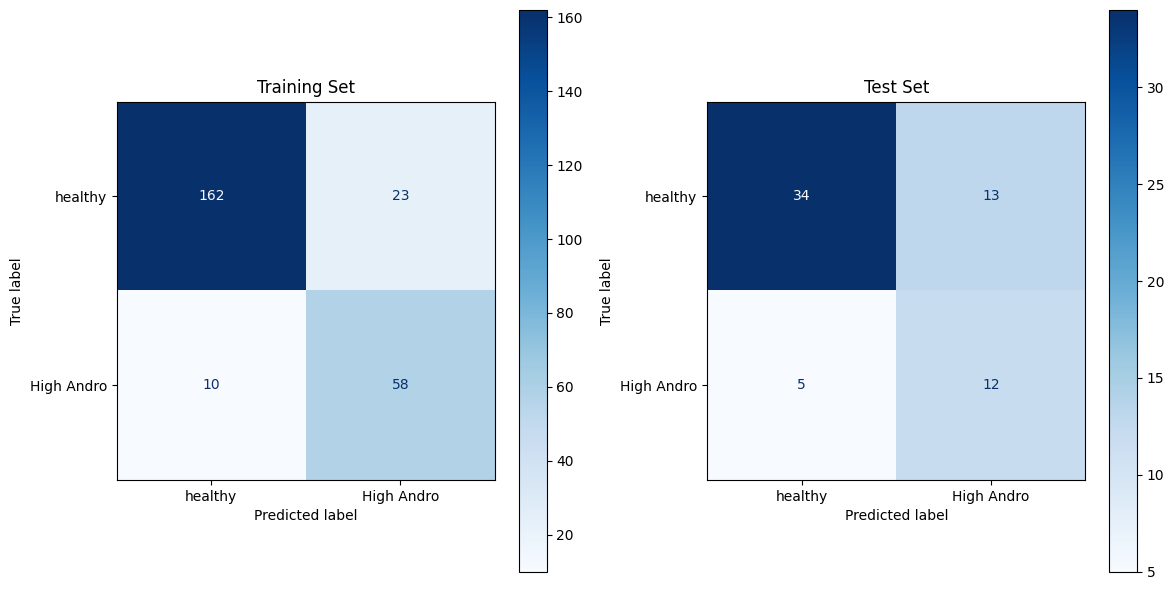

Training set
              precision    recall  f1-score   support

     healthy       0.94      0.88      0.91       185
  High Andro       0.72      0.85      0.78        68

    accuracy                           0.87       253
   macro avg       0.83      0.86      0.84       253
weighted avg       0.88      0.87      0.87       253

Test set
              precision    recall  f1-score   support

     healthy       0.87      0.72      0.79        47
  High Andro       0.48      0.71      0.57        17

    accuracy                           0.72        64
   macro avg       0.68      0.71      0.68        64
weighted avg       0.77      0.72      0.73        64



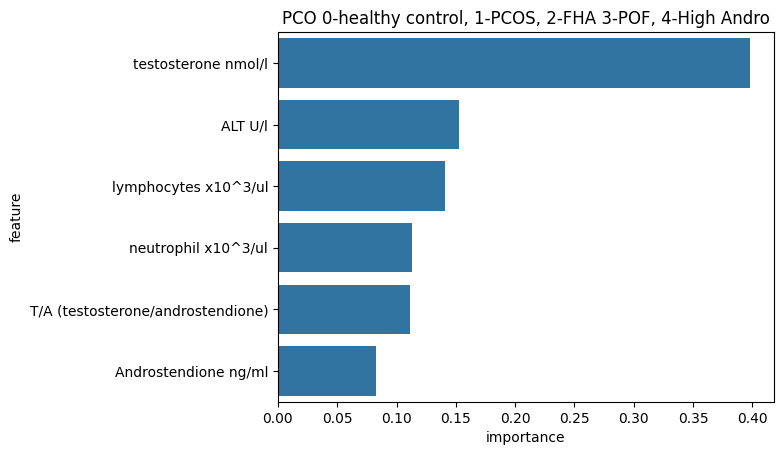

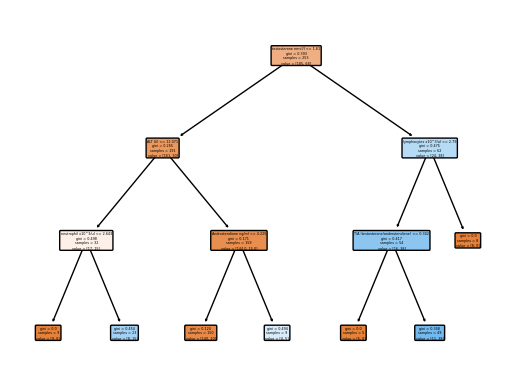

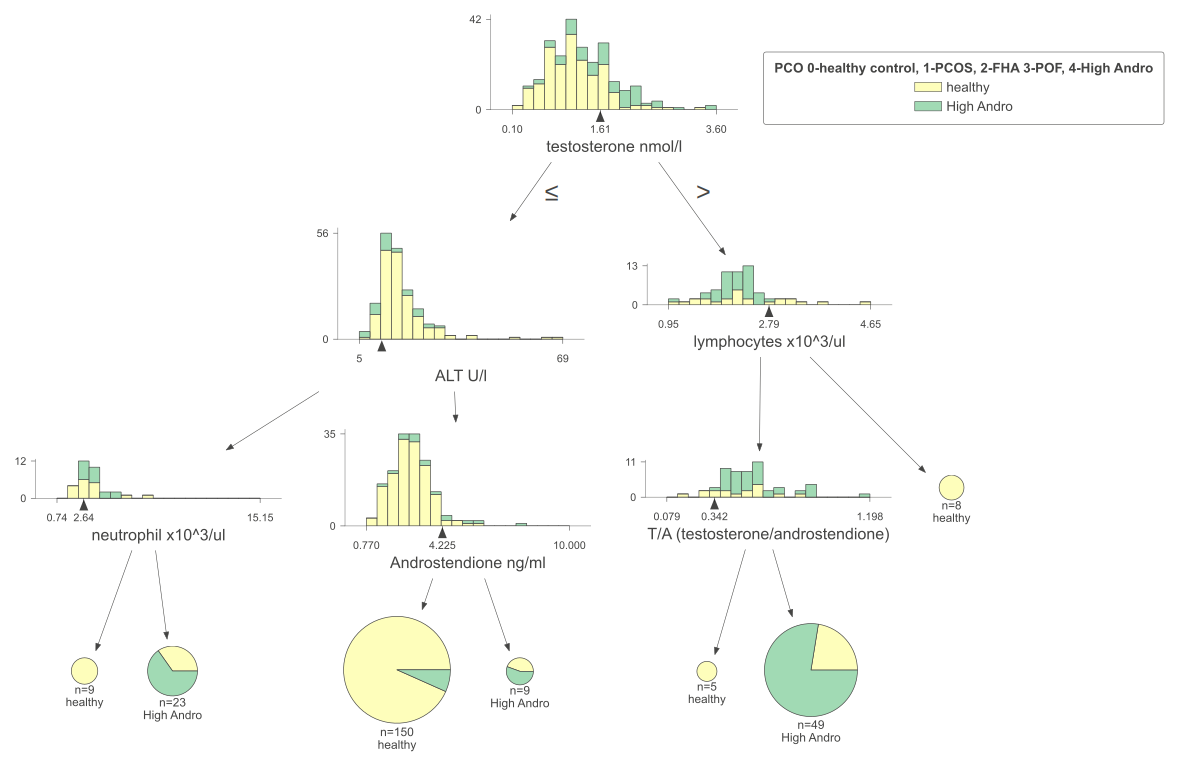

In [26]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=4, min_samples_split=5, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

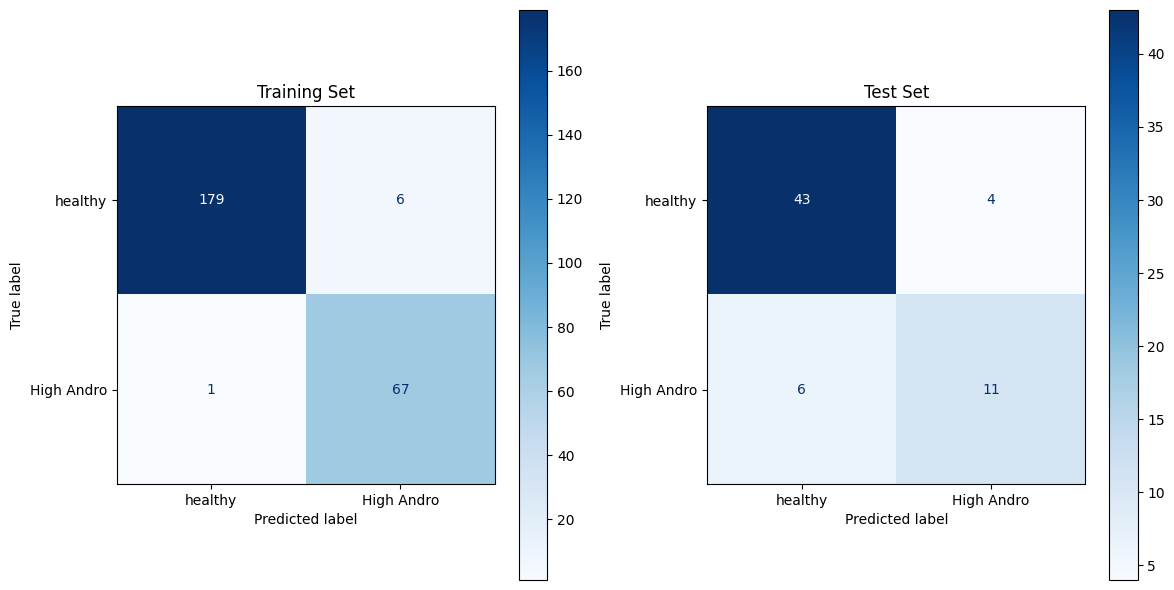

Training set
              precision    recall  f1-score   support

     healthy       0.99      0.97      0.98       185
  High Andro       0.92      0.99      0.95        68

    accuracy                           0.97       253
   macro avg       0.96      0.98      0.97       253
weighted avg       0.97      0.97      0.97       253

Test set
              precision    recall  f1-score   support

     healthy       0.88      0.91      0.90        47
  High Andro       0.73      0.65      0.69        17

    accuracy                           0.84        64
   macro avg       0.81      0.78      0.79        64
weighted avg       0.84      0.84      0.84        64



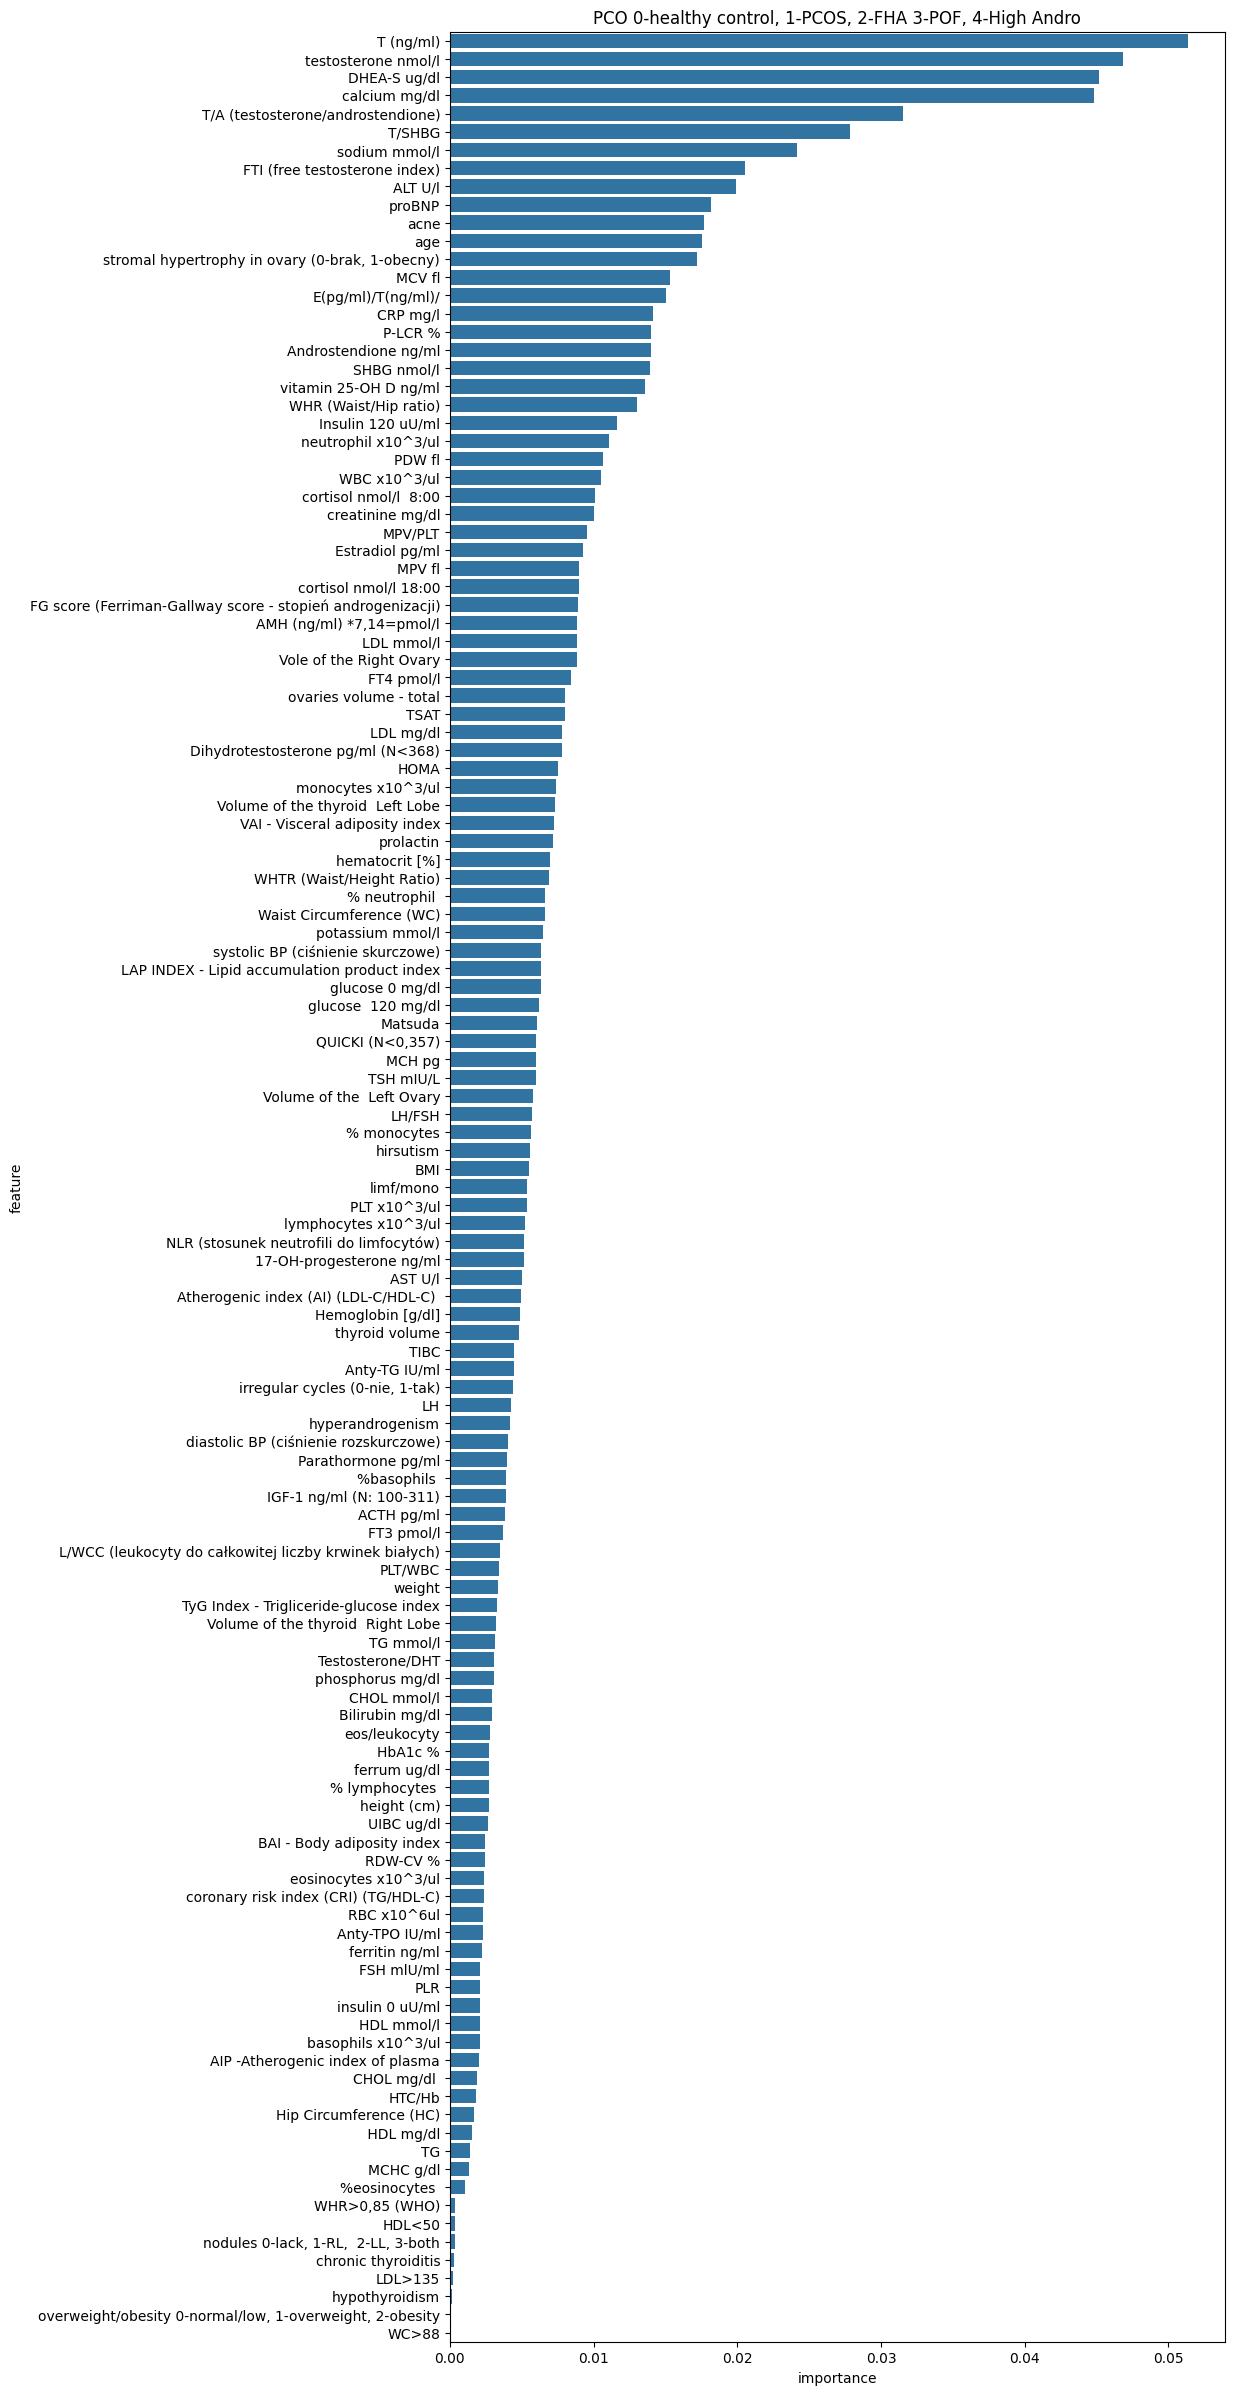

In [27]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)